# 📡 Homework – Generazione e Riconoscimento di Tonalità DTMF

---

**Autrice:** *Elisabetta Roviera*  
**Matricola:** s328422  
**Corso:** Analisi tempo-frequenza e Multiscala  
**Data Esame:** 15 settembre 2025  
**Università:** Politecnico di Torino – Ingegneria Matematica

---

> *Progetto volto allo studio, generazione e riconoscimento di segnali Dual Tone Multi Frequency (DTMF) attraverso tecniche di sintesi, analisi spettrale e sperimentazioni su vari parametri di acquisizione.*


### 📄 Abstract

In questo homework si approfondisce il concetto di **DTMF** (*Dual-Tone Multi-Frequency*), **un sistema di segnali acustici**, tecnologia ampiamente utilizzata nella telefonia per la trasmissione di numeri e simboli mediante combinazioni di tonalità.
L’attività prevede la **generazione** e il **riconoscimento** delle tonalità DTMF relative a sequenze numeriche composte, seguite da una serie di **esperimenti mirati** per analizzare l’impatto di parametri quali la durata dei toni, la presenza di rumore, e la frequenza di campionamento.
Il lavoro combina strumenti di sintesi e analisi spettrale, con l’obiettivo di consolidare le competenze nella rappresentazione e interpretazione dei segnali in ambito tempo-frequenza.

---

# ⚠️ Manca scaletta e commento risultati


## ⚡ Implementazione DTMF

#### 📌 Esercizio 1 – Creazione del dizionario DTMF

Si consideri la tastiera **DTMF** (*Dual-Tone Multi-Frequency*), costituita da una **matrice** con quattro righe e quattro colonne:

* **Ogni riga** corrisponde a una **frequenza bassa** (*low frequency*).
* **Ogni colonna** corrisponde a una **frequenza alta** (*high frequency*).
* Ogni tasto è identificato da una **coppia di frequenze**.

La disposizione tipica è la seguente:

|        | 1209 Hz | 1336 Hz | 1477 Hz | 1633 Hz |
| ------ | ------- | ------- | ------- | ------- |
| 697 Hz | 1       | 2       | 3       | A       |
| 770 Hz | 4       | 5       | 6       | B       |
| 852 Hz | 7       | 8       | 9       | C       |
| 941 Hz | \*      | 0       | #       | D       |

> **Esempio:**
> Premendo il tasto **1** vengono generate due onde sinusoidali: una a **697 Hz** e una a **1209 Hz**.
> Il termine *multifrequenza* deriva proprio dall’uso simultaneo di due toni.

---

**a)** Siano:

$$
F_1 = \{697, \ 770, \ 852, \ 941\}  
$$

$$
F_2 = \{1209, \ 1336, \ 1477, \ 1633\}  
$$

Creare un **dizionario** `tones` che associ ciascun tasto a una **coppia di indici** *(i, j)*:

* `i` → indice della frequenza in **F1** (*bassa*).
* `j` → indice della frequenza in **F2** (*alta*).

La struttura è la seguente:

```
tones = {
    '1': (0, 0), '2': (0, 1), '3': (0, 2),
    '4': (1, 0), '5': (1, 1), '6': (1, 2),
    '7': (2, 0), '8': (2, 1), '9': (2, 2),
    '*': (3, 0), '0': (3, 1), '#': (3, 2),
    'A': (0, 3), 'B': (1, 3), 'C': (2, 3), 'D': (3, 3)
}
```

---

**Esempi di corrispondenza:**

* **Tasto `1`** → `(0, 0)` → Frequenze: `F1[0] = 697 Hz` e `F2[0] = 1209 Hz`.
* **Tasto `5`** → `(1, 1)` → Frequenze: `F1[1] = 770 Hz` e `F2[1] = 1336 Hz`.

---
.
**b)** Stampare il dizionario `tones`

In [1]:
# Esercizio 1: Creazione del dizionario DTMF
# --------------------------------------------------
# - definisco gli array F1 (basse) e F2 (alte)
# - costruisco il dizionario `tones` che mappa ogni tasto a (i, j)
# - funzioni di utilità per ottenere le frequenze associate a un tasto
# - stampa formattata del dizionario in layout tastiera
from typing import List, Dict, Tuple

# ----------------------------
# Punto 1: definizione frequenze
# ----------------------------
def build_frequency_arrays() -> Tuple[List[int], List[int]]:
    """
    Restituisce le due liste di frequenze:
    F1 (low freq) e F2 (high freq)
    """
    F1 = [697, 770, 852, 941]       # righe (low)
    F2 = [1209, 1336, 1477, 1633]   # colonne (high)
    return F1, F2

# ----------------------------
# Punto 2: costruzione dizionario tones
# ----------------------------
def build_tones_dict() -> Dict[str, Tuple[int, int]]:
    """
    Costruisce e restituisce il dizionario `tones` che
    associa ogni tasto alla coppia di indici (i, j).
    """
    tones = {
        '1': (0, 0), '2': (0, 1), '3': (0, 2), 'A': (0, 3),
        '4': (1, 0), '5': (1, 1), '6': (1, 2), 'B': (1, 3),
        '7': (2, 0), '8': (2, 1), '9': (2, 2), 'C': (2, 3),
        '*': (3, 0), '0': (3, 1), '#': (3, 2), 'D': (3, 3)
    }
    return tones

# ----------------------------
# Punto 3: utilità per mapping indici -> frequenze
# ----------------------------
def get_tone_indices(key: str, tones: Dict[str, Tuple[int, int]]) -> Tuple[int, int]:
    """
    Restituisce la coppia di indici (i, j) per un tasto.
    Solleva KeyError se il tasto non esiste.
    """
    return tones[key]

def get_tone_frequencies(key: str,
                         tones: Dict[str, Tuple[int, int]],
                         F1: List[int],
                         F2: List[int]) -> Tuple[int, int]:
    """
    Dato un tasto (es. '1') restituisce le due frequenze (f_low, f_high).
    """
    i, j = get_tone_indices(key, tones)
    return F1[i], F2[j]

# ----------------------------
# Punto 4: stampa leggibile del dizionario
# ----------------------------
def print_tones_table(tones: Dict[str, Tuple[int, int]],
                      F1: List[int],
                      F2: List[int]) -> None:
    """
    Stampa il mapping in formato "tastiera" con frequenze associate.
    """
    keypad_rows = [
        ['1', '2', '3', 'A'],
        ['4', '5', '6', 'B'],
        ['7', '8', '9', 'C'],
        ['*', '0', '#', 'D'],
    ]

    print("Dizionario DTMF (tasto -> (indiceF1, indiceF2) -> (f_low Hz, f_high Hz))\n")
    for row in keypad_rows:
        row_str = []
        for k in row:
            i, j = tones[k]
            f_low, f_high = F1[i], F2[j]
            row_str.append(f"{k}:({i},{j})->{f_low}Hz+{f_high}Hz")
        print("   ".join(row_str))
    print("\nDizionario grezzo (python):")
    print(tones)

# ----------------------------
# Esecuzione principale (esempi)
# ----------------------------
if __name__ == "__main__":
    # Costruisco le frequenze e il dizionario
    F1, F2 = build_frequency_arrays()
    tones = build_tones_dict()

    # (b) Stampare il dizionario in modo leggibile
    print_tones_table(tones, F1, F2)

    # Esempi puntuali (mostro come ricavare le frequenze per alcuni tasti)
    for key in ['1', '5', '0', 'A']:
        f_low, f_high = get_tone_frequencies(key, tones, F1, F2)
        print(f"\nTasto '{key}': indici {tones[key]} -> frequenze {f_low} Hz e {f_high} Hz")


Dizionario DTMF (tasto -> (indiceF1, indiceF2) -> (f_low Hz, f_high Hz))

1:(0,0)->697Hz+1209Hz   2:(0,1)->697Hz+1336Hz   3:(0,2)->697Hz+1477Hz   A:(0,3)->697Hz+1633Hz
4:(1,0)->770Hz+1209Hz   5:(1,1)->770Hz+1336Hz   6:(1,2)->770Hz+1477Hz   B:(1,3)->770Hz+1633Hz
7:(2,0)->852Hz+1209Hz   8:(2,1)->852Hz+1336Hz   9:(2,2)->852Hz+1477Hz   C:(2,3)->852Hz+1633Hz
*:(3,0)->941Hz+1209Hz   0:(3,1)->941Hz+1336Hz   #:(3,2)->941Hz+1477Hz   D:(3,3)->941Hz+1633Hz

Dizionario grezzo (python):
{'1': (0, 0), '2': (0, 1), '3': (0, 2), 'A': (0, 3), '4': (1, 0), '5': (1, 1), '6': (1, 2), 'B': (1, 3), '7': (2, 0), '8': (2, 1), '9': (2, 2), 'C': (2, 3), '*': (3, 0), '0': (3, 1), '#': (3, 2), 'D': (3, 3)}

Tasto '1': indici (0, 0) -> frequenze 697 Hz e 1209 Hz

Tasto '5': indici (1, 1) -> frequenze 770 Hz e 1336 Hz

Tasto '0': indici (3, 1) -> frequenze 941 Hz e 1336 Hz

Tasto 'A': indici (0, 3) -> frequenze 697 Hz e 1633 Hz


#### 📌 Esercizio 2 – Generazione del suono DTMF

Scrivere una funzione `tone` che generi un **segnale sonoro** corrispondente al tasto DTMF specificato, **combinando due onde sinusoidali** di frequenza diversa e restituendo il risultato in un array di valori, pronto per la riproduzione o il salvataggio come file audio.

---

**a)** La funzione `tone` deve ricevere in ingresso:

* **`number`** (*string*): il tasto da generare (ad esempio `'1'`, `'2'`, `'*'`, ecc.).
* **`duration`** (*float*): la durata del tono, in secondi.

---

**b)** Creare un array di tempi $t$ che rappresenti l’istante di campionamento del segnale, con:

$$
t \in [0, \ \text{duration}], \quad \Delta t = \frac{1}{F_s}
$$

dove $F_s$ è la **frequenza di campionamento**.

---

**c)** Calcolare il segnale:

$$
x(t) = \cos(2\pi f_1 t) + \cos(2\pi f_2 t)
$$

dove $f_1$ e $f_2$ sono le frequenze **bassa** e **alta** associate al tasto DTMF scelto.

---

**d)** Dopo aver generato il segnale:

1. **Visualizzare** il segnale nel dominio del tempo.
2. **Salvare** il segnale in un file audio.
3. **Riprodurre** il suono generato.



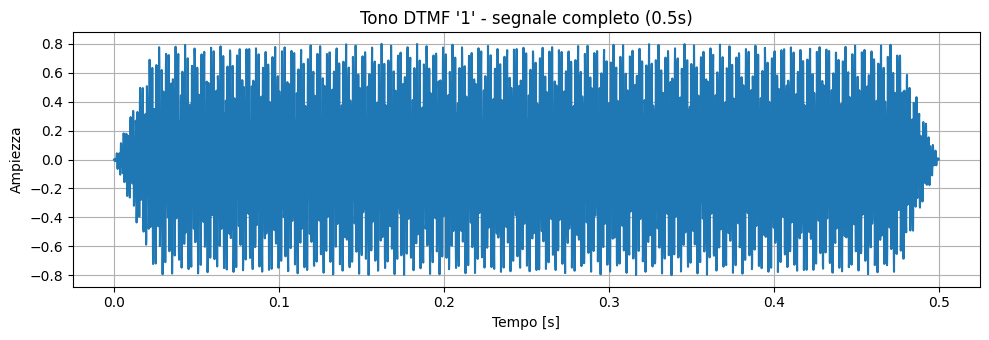

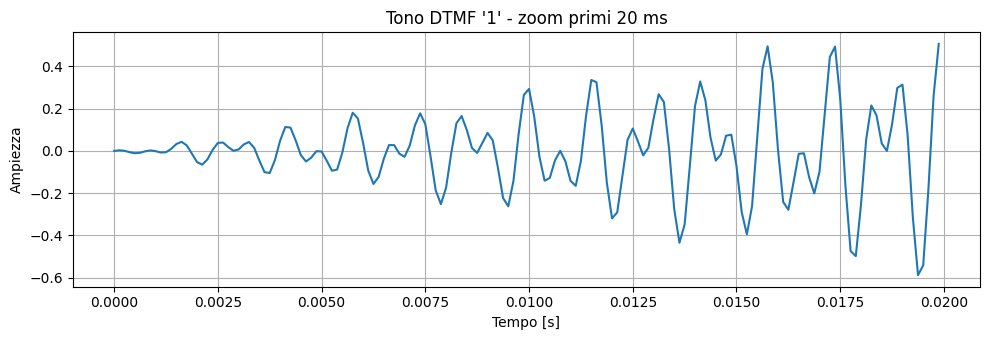

File WAV salvato in: ./dtmf_1_500ms_fs8000.wav

Mapping tasto -> (indiceF1, indiceF2) -> (f_low Hz, f_high Hz):
1: (0,0) -> 697 Hz, 1209 Hz
2: (0,1) -> 697 Hz, 1336 Hz
3: (0,2) -> 697 Hz, 1477 Hz
4: (1,0) -> 770 Hz, 1209 Hz
5: (1,1) -> 770 Hz, 1336 Hz
6: (1,2) -> 770 Hz, 1477 Hz
7: (2,0) -> 852 Hz, 1209 Hz
8: (2,1) -> 852 Hz, 1336 Hz
9: (2,2) -> 852 Hz, 1477 Hz
0: (3,1) -> 941 Hz, 1336 Hz
*: (3,0) -> 941 Hz, 1209 Hz
#: (3,2) -> 941 Hz, 1477 Hz
A: (0,3) -> 697 Hz, 1633 Hz
B: (1,3) -> 770 Hz, 1633 Hz
C: (2,3) -> 852 Hz, 1633 Hz
D: (3,3) -> 941 Hz, 1633 Hz


In [2]:
# ##############################################################
# Esercizio 2 - Generazione del suono DTMF
# ##############################################################
# - Funzioni modulari, documentate e suddivise per punti
# - Generazione del segnale x(t) = cos(2π f1 t) + cos(2π f2 t)
# - Plot del segnale (tempo) e zoom
# - Salvataggio in WAV (mono, int16)
#
# Requisiti: numpy, matplotlib, scipy
# (es. pip install numpy matplotlib scipy)
# ##############################################################

import numpy as np
from typing import Tuple, Dict, List
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os

# ----------------------------
# Punto 0: definizione frequenze e mappatura (coerente con es.1)
# ----------------------------
def build_frequency_arrays() -> Tuple[List[int], List[int]]:
    """
    Restituisce le due liste di frequenze:
    F1 (low freq) e F2 (high freq)
    """
    F1 = [697, 770, 852, 941]       # righe (low)
    F2 = [1209, 1336, 1477, 1633]   # colonne (high)
    return F1, F2

def build_tones_dict() -> Dict[str, Tuple[int, int]]:
    """
    Costruisce e restituisce il dizionario `tones` che
    associa ogni tasto alla coppia di indici (i, j).
    """
    tones = {
        '1': (0, 0), '2': (0, 1), '3': (0, 2), 'A': (0, 3),
        '4': (1, 0), '5': (1, 1), '6': (1, 2), 'B': (1, 3),
        '7': (2, 0), '8': (2, 1), '9': (2, 2), 'C': (2, 3),
        '*': (3, 0), '0': (3, 1), '#': (3, 2), 'D': (3, 3)
    }
    return tones

# ----------------------------
# Punto 1: utilità per ottenere le frequenze date le mapping
# ----------------------------
def get_tone_frequencies(key: str,
                         tones: Dict[str, Tuple[int, int]],
                         F1: List[int],
                         F2: List[int]) -> Tuple[int, int]:
    """
    Dato un tasto (es. '1') restituisce le due frequenze (f_low, f_high).
    Solleva KeyError se il tasto non esiste.
    """
    if key not in tones:
        raise KeyError(f"Tasto '{key}' non presente nel dizionario tones.")
    i, j = tones[key]
    return F1[i], F2[j]

# ----------------------------
# Punto 2: funzione tone(number, duration, fs, amplitude)
# ----------------------------
def tone(number: str,
         duration: float,
         fs: int = 8000,
         amplitude: float = 0.8,
         window: str = None) -> Tuple[np.ndarray, np.ndarray, int]:
    """
    Genera il segnale DTMF per il tasto `number`.

    Parametri:
      - number: tasto come stringa, es. '1' o '*'
      - duration: durata in secondi (float)
      - fs: frequenza di campionamento (default 8000 Hz)
      - amplitude: ampiezza massima normalizzata (0..1)
      - window: opzionale, 'hann' o 'fade' per applicare un leggero fade-in/out

    Restituisce: (t, x, fs)
      - t: array dei tempi
      - x: segnale normalizzato in float (-1..1)
      - fs: sample rate
    """
    # preleva mappe e frequenze
    F1, F2 = build_frequency_arrays()
    tones = build_tones_dict()
    f_low, f_high = get_tone_frequencies(number, tones, F1, F2)

    # vettore dei tempi
    t = np.arange(0.0, duration, 1.0 / fs)

    # somma dei due coseni
    x = np.cos(2 * np.pi * f_low * t) + np.cos(2 * np.pi * f_high * t)

    # normalizzazione e scala all'ampiezza richiesta
    max_val = np.max(np.abs(x))
    if max_val > 0:
        x = (x / max_val) * amplitude

    # applica finestra leggera se richiesta per evitare clic
    if window is not None:
        if window.lower() == 'hann':
            w = np.hanning(len(x))
            x = x * w
        elif window.lower() == 'fade':
            # semplice fade-in/out lineare del 5% della durata
            n = len(x)
            fade_len = max(1, int(0.05 * n))
            env = np.ones(n)
            env[:fade_len] *= np.linspace(0.0, 1.0, fade_len)
            env[-fade_len:] *= np.linspace(1.0, 0.0, fade_len)
            x = x * env
        # altrimenti ignora

    return t, x, fs

# ----------------------------
# Punto 3: funzione per salvare in WAV
# ----------------------------
def save_wav(filename: str, x: np.ndarray, fs: int, out_dir: str = "./") -> str:
    """
    Salva il segnale mono x (float -1..1) in un file WAV 16-bit.
    Restituisce il percorso del file salvato.
    """
    # crea cartella se necessaria
    os.makedirs(out_dir, exist_ok=True)
    # scala su int16
    int_data = np.int16(np.clip(x, -1.0, 1.0) * 32767)
    out_path = os.path.join(out_dir, filename)
    wavfile.write(out_path, fs, int_data)
    return out_path

# ----------------------------
# Punto 4: plotting del segnale (un plot alla volta)
# ----------------------------
def plot_signal(t: np.ndarray, x: np.ndarray, title: str, max_points: int = None):
    """
    Plotta il segnale nel dominio del tempo.
    Se max_points è fornito mostra solo i primi max_points campioni.
    """
    plt.figure(figsize=(10, 3.5))
    if max_points is not None:
        plt.plot(t[:max_points], x[:max_points])
    else:
        plt.plot(t, x)
    plt.title(title)
    plt.xlabel("Tempo [s]")
    plt.ylabel("Ampiezza")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------
# Esempio d'uso (da eseguire quando vuoi)
# ----------------------------
if __name__ == "__main__":
    # Parametri di esempio (modifica a piacere)
    key = '1'
    duration = 0.5      # secondi
    fs = 8000           # campionamento
    amp = 0.8           # ampiezza normalizzata
    out_folder = "./"   # cartella di salvataggio del WAV

    # Genera il tono
    t, x, fs_out = tone(key, duration, fs=fs, amplitude=amp, window='fade')

    # Plot: segnale completo
    plot_signal(t, x, f"Tono DTMF '{key}' - segnale completo ({duration}s)")

    # Plot: zoom primi 20 ms
    zoom_time = 0.02  # 20 ms
    zoom_points = int(min(len(t), np.ceil(zoom_time * fs_out)))
    plot_signal(t, x, f"Tono DTMF '{key}' - zoom primi {int(zoom_time*1000)} ms", max_points=zoom_points)

    # Salvataggio WAV (file mono, int16)
    filename = f"dtmf_{key}_{int(duration*1000)}ms_fs{fs_out}.wav"
    path = save_wav(filename, x, fs_out, out_dir=out_folder)
    print(f"File WAV salvato in: {path}")

    # Stampa mappatura per riferimento
    F1, F2 = build_frequency_arrays()
    tones = build_tones_dict()
    print("\nMapping tasto -> (indiceF1, indiceF2) -> (f_low Hz, f_high Hz):")
    for k in ['1','2','3','4','5','6','7','8','9','0','*','#','A','B','C','D']:
        i, j = tones[k]
        print(f"{k}: ({i},{j}) -> {F1[i]} Hz, {F2[j]} Hz")

# ##############################################################
# Fine Esercizio 2
# ##############################################################


#### 📌 Esercizio 3 – Generazione della sequenza di toni

**a)** Scrivere una funzione `dialNumber` che prenda due argomenti:

• `numbers`: una stringa di numeri o simboli, che rappresenta i tasti da ”premere” (ad esempio, un numero di telefono).

• `toneDuration`: la durata di ciascun tono in secondi.

**b)** Generare la lista di toni, uno per ogni cifra o simbolo nella stringa
`numbers` e generare il segnale audio corrispondente per la durata specificata
in `toneDuration` usando la funzione precedentemente definita.

**c)** Concatenare i toni e restituire una sequenza continua di dati audio
che rappresenta l’intera sequenza di tasti premuti.

**d)** Visualizzare poi il segnale nel tempo e salvare il file audio.

---



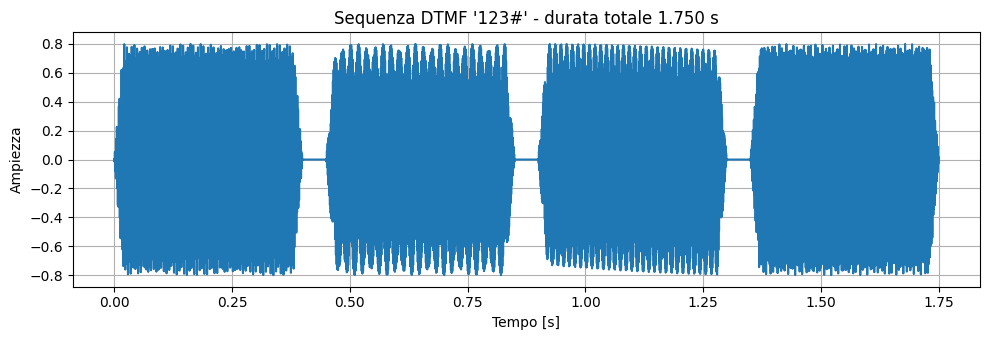

File WAV salvato in: ./dtmf_sequence_123hash_400ms_fs8000.wav


In [3]:
# ##############################################################
# Esercizio 3 - Generazione della sequenza di toni DTMF
# ##############################################################
# - Funzioni modulari e commentate
# - dialNumber: genera sequenza concatenata di toni DTMF dato un input string
# - plotting del segnale risultante e salvataggio in WAV
#
# Requisiti: numpy, matplotlib, scipy
# (es. pip install numpy matplotlib scipy)
# ##############################################################

import numpy as np
from typing import Tuple, Dict, List
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os

# ----------------------------
# Punto 0: (Ri)definizione mappature e utilità (coerente con es.1/es.2)
# ----------------------------
def build_frequency_arrays() -> Tuple[List[int], List[int]]:
    """Restituisce le due liste di frequenze F1 (low) e F2 (high)."""
    F1 = [697, 770, 852, 941]       # righe (low)
    F2 = [1209, 1336, 1477, 1633]   # colonne (high)
    return F1, F2

def build_tones_dict() -> Dict[str, Tuple[int, int]]:
    """Costruisce il dizionario `tones` che associa ogni tasto alla coppia di indici (i, j)."""
    tones = {
        '1': (0, 0), '2': (0, 1), '3': (0, 2), 'A': (0, 3),
        '4': (1, 0), '5': (1, 1), '6': (1, 2), 'B': (1, 3),
        '7': (2, 0), '8': (2, 1), '9': (2, 2), 'C': (2, 3),
        '*': (3, 0), '0': (3, 1), '#': (3, 2), 'D': (3, 3)
    }
    return tones

def get_tone_frequencies(key: str,
                         tones: Dict[str, Tuple[int, int]],
                         F1: List[int],
                         F2: List[int]) -> Tuple[int, int]:
    """Dato un tasto restituisce le due frequenze (f_low, f_high). Solleva KeyError se tasto non valido."""
    if key not in tones:
        raise KeyError(f"Tasto '{key}' non presente nel dizionario tones.")
    i, j = tones[key]
    return F1[i], F2[j]

# ----------------------------
# Punto 1: funzione tone (riutilizza logica dell'es.2)
# ----------------------------
def tone(number: str,
         duration: float,
         fs: int = 8000,
         amplitude: float = 0.8,
         window: str = None) -> Tuple[np.ndarray, np.ndarray, int]:
    """
    Genera il singolo tono DTMF per `number`.
    Restituisce (t, x, fs) dove x è float in [-1,1].
    """
    F1, F2 = build_frequency_arrays()
    tones = build_tones_dict()
    f_low, f_high = get_tone_frequencies(number, tones, F1, F2)

    t = np.arange(0.0, duration, 1.0 / fs)
    x = np.cos(2 * np.pi * f_low * t) + np.cos(2 * np.pi * f_high * t)

    # normalizzazione e scala
    max_val = np.max(np.abs(x))
    if max_val > 0:
        x = (x / max_val) * amplitude

    # piccolo fade per evitare clic (opzionale)
    if window is not None:
        if window.lower() == 'hann':
            w = np.hanning(len(x))
            x = x * w
        elif window.lower() == 'fade':
            n = len(x)
            fade_len = max(1, int(0.05 * n))
            env = np.ones(n)
            env[:fade_len] *= np.linspace(0.0, 1.0, fade_len)
            env[-fade_len:] *= np.linspace(1.0, 0.0, fade_len)
            x = x * env

    return t, x, fs

# ----------------------------
# Punto 2: utilità salvataggio e plotting
# ----------------------------
def save_wav(filename: str, x: np.ndarray, fs: int, out_dir: str = "./") -> str:
    """
    Salva segnale mono x (float -1..1) in WAV 16-bit.
    Restituisce il percorso del file salvato.
    """
    os.makedirs(out_dir, exist_ok=True)
    int_data = np.int16(np.clip(x, -1.0, 1.0) * 32767)
    out_path = os.path.join(out_dir, filename)
    wavfile.write(out_path, fs, int_data)
    return out_path

def plot_signal(t: np.ndarray, x: np.ndarray, title: str, max_points: int = None):
    """Plotta il segnale nel dominio del tempo. Se max_points è fornito mostra solo i primi campioni."""
    plt.figure(figsize=(10, 3.5))
    if max_points is not None:
        plt.plot(t[:max_points], x[:max_points])
    else:
        plt.plot(t, x)
    plt.title(title)
    plt.xlabel("Tempo [s]")
    plt.ylabel("Ampiezza")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------
# Punto 3: funzione dialNumber (implementazione richiesta)
# ----------------------------
def dialNumber(numbers: str,
               toneDuration: float,
               fs: int = 8000,
               interToneGap: float = 0.05,
               amplitude: float = 0.8,
               window: str = 'fade',
               out_dir: str = "./",
               filename_prefix: str = None) -> Tuple[np.ndarray, int, str]:
    """
    Genera la sequenza concatenata di toni DTMF per la stringa `numbers`.

    Parametri:
      - numbers: stringa di tasti (es. "123#*A")
      - toneDuration: durata di ciascun tono in secondi
      - fs: frequenza di campionamento
      - interToneGap: pausa di silenzio tra i toni (secondi)
      - amplitude: ampiezza normalizzata dei toni
      - window: 'fade'|'hann'|None applicata a ciascun tono
      - out_dir: cartella di salvataggio del WAV
      - filename_prefix: prefisso del file WAV (default: dtmf_sequence_<numbers>)

    Restituisce:
      - x: array concatenato dei dati audio (float -1..1)
      - fs: sample rate
      - path: percorso del file WAV salvato
    """
    # validazioni di base
    if toneDuration <= 0:
        raise ValueError("toneDuration deve essere > 0.")
    if interToneGap < 0:
        raise ValueError("interToneGap non può essere negativo.")

    tones = build_tones_dict()  # per validare i caratteri
    # costruisco il vettore di silenzio per la pausa (se interToneGap > 0)
    gap = np.zeros(int(np.round(interToneGap * fs)), dtype=float) if interToneGap > 0 else np.array([], dtype=float)

    sequence_parts = []
    time_offsets = []  # opzionale: per sapere dove inizia ogni tono (in secondi)
    current_time = 0.0

    for idx, ch in enumerate(numbers):
        if ch not in tones:
            raise KeyError(f"Carattere '{ch}' non valido per DTMF.")
        # genera il tono per il singolo tasto
        t, x_tone, _ = tone(ch, toneDuration, fs=fs, amplitude=amplitude, window=window)
        sequence_parts.append(x_tone)
        time_offsets.append(current_time)
        current_time += len(x_tone) / fs

        # aggiungi gap (tranne dopo l'ultimo tono)
        if idx < len(numbers) - 1 and gap.size > 0:
            sequence_parts.append(gap)
            current_time += gap.size / fs

    if len(sequence_parts) == 0:
        x = np.array([], dtype=float)
        total_time = 0.0
    else:
        x = np.concatenate(sequence_parts)
        total_time = len(x) / fs

    # plotting: segnale completo (attenzione per sequenze molto lunghe)
    t_full = np.arange(0, len(x)) / fs
    plot_signal(t_full, x, f"Sequenza DTMF '{numbers}' - durata totale {total_time:.3f} s")

    # salva in WAV
    safe_numbers = "".join(ch if ch.isalnum() else {'*':'star','#':'hash'}.get(ch,ch) for ch in numbers)
    if filename_prefix is None:
        filename_prefix = f"dtmf_sequence_{safe_numbers}_{int(toneDuration*1000)}ms"
    filename = f"{filename_prefix}_fs{fs}.wav"
    path = save_wav(filename, x, fs, out_dir=out_dir)

    print(f"File WAV salvato in: {path}")
    return x, fs, path

# ----------------------------
# Esempio d'uso (non eseguito qui, copia/incolla nel notebook e runnalo tu)
# ----------------------------
if __name__ == "__main__":
    # Esempio: genera la sequenza "123#"
    numbers = "123#"
    toneDuration = 0.4     # secondi per tono
    fs = 8000
    interToneGap = 0.05    # 50 ms tra toni
    out_dir = "./"         # cartella di salvataggio

    x, fs_out, wav_path = dialNumber(numbers, toneDuration, fs=fs,
                                     interToneGap=interToneGap,
                                     amplitude=0.8, window='fade',
                                     out_dir=out_dir)
    # Nota: se vuoi zoomare su una sezione particolare, usa plot_signal con max_points



#### 📌 Esercizio 4 – Analisi spettrale (DFT)

Generare un array da −Fs/2 a Fs/2, dove Fs è la frequenza di campionamento con un numero di punti pari alla lunghezza del segnale audio. Calcolare i coefficienti della DFT e visualizzarne il modulo nel dominio delle frequenze. È possibile identificare le frequenze dei toni?

---



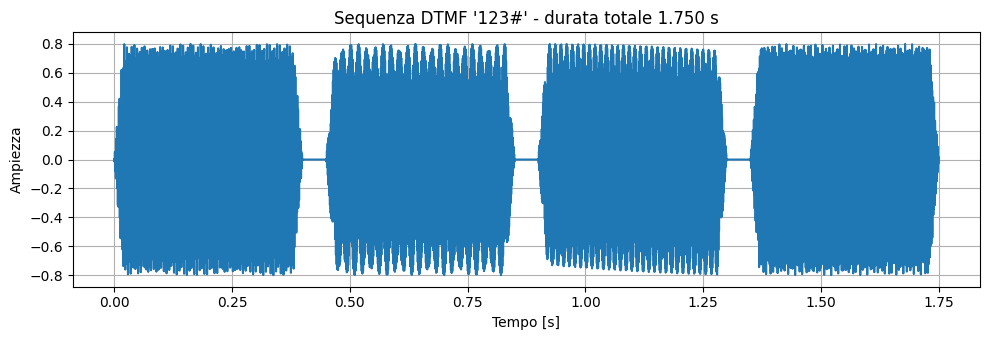

File WAV salvato in: ./dtmf_sequence_123hash_400ms_fs8000.wav


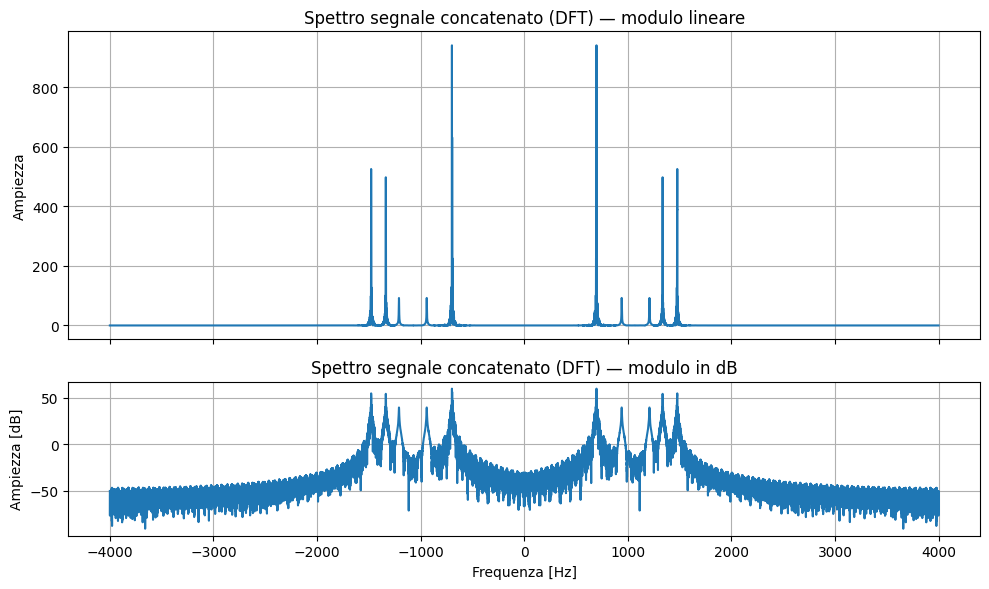

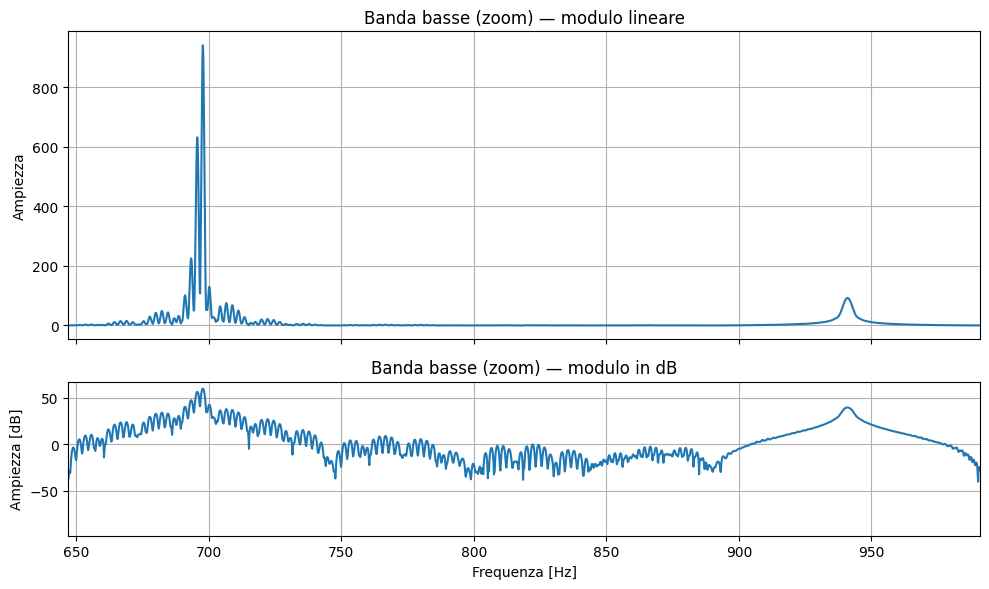

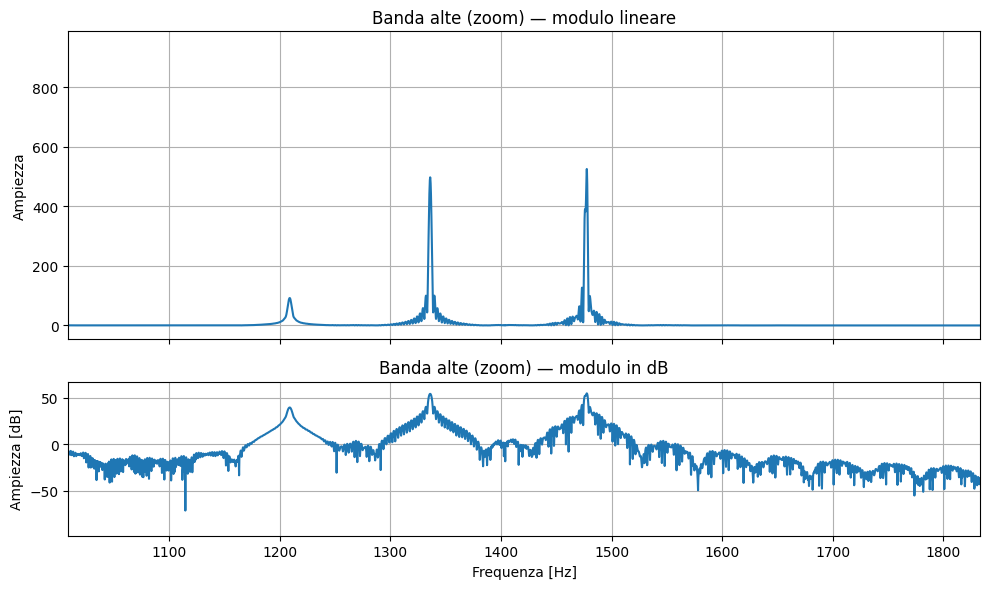

Misure bande basse: {697: (np.float64(697.7142857142853), np.float64(941.6339708507448)), 770: (np.float64(766.7142857142853), np.float64(2.7654543977539254)), 852: (np.float64(853.2857142857138), np.float64(0.3313366858949509)), 941: (np.float64(941.0), np.float64(92.46738562233107))}
Misure bande alte: {1209: (np.float64(1209.0), np.float64(92.25869174930577)), 1336: (np.float64(1336.0), np.float64(498.0395806285584)), 1477: (np.float64(1477.5714285714284), np.float64(525.9425410852454)), 1633: (np.float64(1638.8571428571422), np.float64(0.12164910291794993))}


In [5]:
# ##############################################################
# Esercizio 4 - Analisi spettrale (DFT)
# ##############################################################
# - Calcolo della DFT (con fftshift) su un segnale audio mono
# - Costruzione dell'asse delle frequenze da -Fs/2 a Fs/2
# - Visualizzazione del modulo (lineare e/o in dB)
# - Utility per riconoscimento dei picchi intorno alle frequenze DTMF
#
# Requisiti: numpy, matplotlib
# (es. pip install numpy matplotlib)
# ##############################################################

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict

# ----------------------------
# Funzione: compute_spectrum
# ----------------------------
def compute_spectrum(x: np.ndarray,
                     fs: int,
                     zero_pad: int = 1,
                     window: str = 'hann') -> Tuple[np.ndarray, np.ndarray]:
    """
    Calcola la DFT del segnale x e ritorna (f_shifted, Xs_mag)
      - x: segnale mono (1D)
      - fs: frequenza di campionamento
      - zero_pad: fattore di zero-padding (1 = nessun padding; 4 = N->4N)
      - window: None|'hann'|'rect' (applica finestra al segnale prima della FFT)

    Restituisce:
      - f_shifted: asse delle frequenze (da -fs/2 a +fs/2)
      - Xs_mag: modulo dello spettro corrispondente (same length as f_shifted)
    """
    # assicurati che x sia 1D float
    x = np.asarray(x, dtype=float).flatten()
    N = len(x)
    if N == 0:
        return np.array([]), np.array([])

    # finestra
    if window is None or window.lower() == 'rect':
        w = np.ones(N)
    elif window.lower() == 'hann':
        w = np.hanning(N)
    else:
        # default fallback a rettangolare se window non riconosciuta
        w = np.ones(N)

    xw = x * w

    # zero-padding
    Npad = int(max(1, N * int(zero_pad)))
    # se zero_pad non intero, supportiamo frazionario: Npad = int(N * float(zero_pad))
    try:
        Npad = int(N * float(zero_pad))
    except Exception:
        Npad = N

    # calcolo FFT e shift
    X = np.fft.fft(xw, n=Npad)
    Xs = np.fft.fftshift(X)
    Xs_mag = np.abs(Xs)

    # asse delle frequenze centrato in zero
    f_shifted = np.linspace(-fs/2, fs/2, len(Xs_mag), endpoint=False)

    return f_shifted, Xs_mag

# ----------------------------
# Funzione: plot_spectrum
# ----------------------------
def plot_spectrum(f: np.ndarray,
                  X_mag: np.ndarray,
                  title: str = "Spettro (modulo)",
                  show_db: bool = True,
                  db_ref: float = 1.0,
                  db_eps: float = 1e-12,
                  xlim: Tuple[float, float] = None):
    """
    Plotta lo spettro. Per default mostra sia il modulo lineare che il plot in dB (sotto).
    Parametri:
      - f: asse delle frequenze (Hz), centrato in zero
      - X_mag: modulo dello spettro (same length)
      - show_db: se True mostra anche il plot in dB sotto
      - db_ref: riferimento per il calcolo in dB
      - db_eps: epsilon per evitare log(0)
      - xlim: tuple (fmin, fmax) per zoom frequenziale
    """
    if f.size == 0 or X_mag.size == 0:
        print("Warning: spettro vuoto, niente da plottare.")
        return

    if show_db:
        # due subplots verticali semplici (ogni plot singolo, non subplot multipli complessi)
        fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True,
                                gridspec_kw={'height_ratios': [2, 1]})
        axs[0].plot(f, X_mag)
        axs[0].set_title(title + " — modulo lineare")
        axs[0].set_ylabel("Ampiezza")
        axs[0].grid(True)
        if xlim is not None:
            axs[0].set_xlim(xlim)

        X_db = 20 * np.log10(X_mag / db_ref + db_eps)
        axs[1].plot(f, X_db)
        axs[1].set_title(title + " — modulo in dB")
        axs[1].set_xlabel("Frequenza [Hz]")
        axs[1].set_ylabel("Ampiezza [dB]")
        axs[1].grid(True)
        if xlim is not None:
            axs[1].set_xlim(xlim)

        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(10, 4))
        plt.plot(f, X_mag)
        plt.title(title + " — modulo lineare")
        plt.xlabel("Frequenza [Hz]")
        plt.ylabel("Ampiezza")
        if xlim is not None:
            plt.xlim(xlim)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ----------------------------
# Funzione: measure_candidates
# ----------------------------
def measure_candidates(f: np.ndarray,
                       X_mag: np.ndarray,
                       candidates: List[float],
                       delta_hz: float = 5.0) -> Dict[float, Tuple[float, float]]:
    """
    Per ogni frequenza candidata in 'candidates' misura il picco locale
    in X_mag nella finestra [cand - delta_hz, cand + delta_hz].

    Restituisce un dizionario:
      cand_freq -> (f_best, magnitude_best)
    dove f_best è la frequenza (dell'asse f) del massimo locale trovato vicino a cand,
    magnitude_best è il valore spettrale corrispondente.
    """
    out = {}
    # assicuriamoci che f sia crescente
    # (dovrebbe essere -fs/2 ... +fs/2)
    for cand in candidates:
        # determina gli indici nella finestra
        idxs = np.where((f >= cand - delta_hz) & (f <= cand + delta_hz))[0]
        if idxs.size == 0:
            out[cand] = (np.nan, 0.0)
            continue
        sub_mag = X_mag[idxs]
        # trova indice del massimo nella finestra
        k = np.argmax(sub_mag)
        best_idx = idxs[k]
        out[cand] = (f[best_idx], X_mag[best_idx])
    return out

# ----------------------------
# Funzione: identify_dtmf_frequencies
# ----------------------------
def identify_dtmf_frequencies(x: np.ndarray,
                              fs: int,
                              F1: List[float],
                              F2: List[float],
                              zero_pad: int = 4,
                              window: str = 'hann',
                              delta_hz: float = 8.0,
                              plot: bool = True) -> Dict[str, Dict[float, Tuple[float, float]]]:
    """
    Calcola lo spettro del segnale x e misura le ampiezze intorno alle frequenze
    candidate F1 (basse) e F2 (alte).

    Restituisce una struttura:
      { 'F1': {f_cand: (f_best, mag)}, 'F2': { ... } }

    Se plot=True, mostra lo spettro con zoom sulle bande rilevanti.
    """
    f, X_mag = compute_spectrum(x, fs, zero_pad=zero_pad, window=window)

    # misura intorno a candidate
    meas1 = measure_candidates(f, X_mag, F1, delta_hz=delta_hz)
    meas2 = measure_candidates(f, X_mag, F2, delta_hz=delta_hz)

    if plot:
        # plot spettro completo (attenzione per segnali molto lunghi / zero-pad grandi)
        plot_spectrum(f, X_mag, title="Spettro segnale concatenato (DFT)", show_db=True)

        # zoom su bande basse e alte per evidenziare i picchi DTMF
        fmin_low, fmax_low = min(F1) - 50, max(F1) + 50
        fmin_high, fmax_high = min(F2) - 200, max(F2) + 200
        plot_spectrum(f, X_mag, title="Banda basse (zoom)", show_db=True, xlim=(fmin_low, fmax_low))
        plot_spectrum(f, X_mag, title="Banda alte (zoom)", show_db=True, xlim=(fmin_high, fmax_high))

    return {'F1': meas1, 'F2': meas2}

# ----------------------------
# Esempio d'uso (copia/incolla nel notebook e esegui)
# ----------------------------
if __name__ == "__main__":
    # Esempio di chiamata:
    #  - x: segnale mono ottenuto da dialNumber(...) o simile
    #  - fs: sample rate (es. 8000)
    #
    # from esercizio3 import dialNumber
    x, fs, path = dialNumber("123#", toneDuration=0.4, fs=8000)
    #
    # Poi:
    F1, F2 = [697,770,852,941], [1209,1336,1477,1633]
    result = identify_dtmf_frequencies(x, fs, F1, F2, zero_pad=4, window='hann', delta_hz=8.0, plot=True)
    #
    # Esempio (pseudo):
    print("Misure bande basse:", result['F1'])
    print("Misure bande alte:", result['F2'])
    pass
# ##############################################################
# Fine Esercizio 4
# ##############################################################


#### 📌 Esercizio 5 – Estrazione delle frequenze

Scrivere una funzione che ricostruisca la sequenza a partire dal segnale sonoro. Suggerimento: Controllare ciascuna delle frequenze possibili e scegliere la frequenza che ha l’ampiezza più alta nello spettro.

---

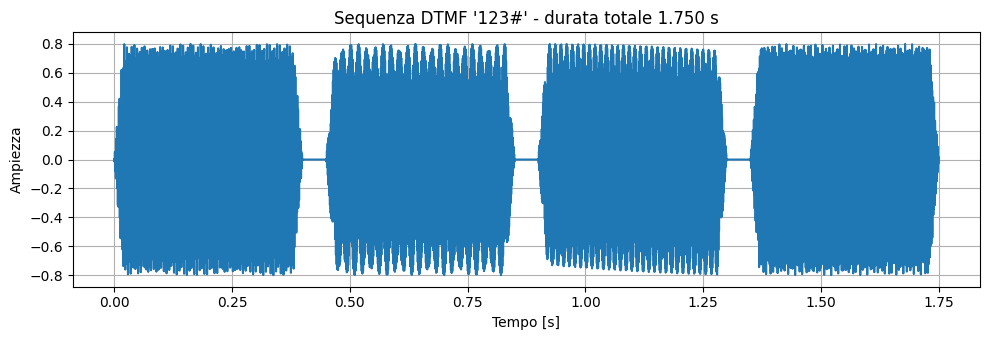

File WAV salvato in: ./dtmf_sequence_123hash_400ms_fs8000.wav
Decodificato: 123#
Dettagli: [('1', 1.9951847859516758), ('2', 1.9951850548396253), ('3', 1.9999999412770677), ('#', 1.9951850382732585)]


In [6]:
# ##############################################################
# Esercizio 5 - Estrazione / decodifica della sequenza DTMF
# ##############################################################
# - Funzioni modulari e commentate
# - Segmentazione (basata su durata nota o energia)
# - Per ogni segmento: finestra, FFT (zero-padding), ricerca picchi
# - Mapping frequenze -> coppia (i,j) -> tasto
#
# Requisiti: numpy, matplotlib (opzionale per debug/plot)
# ##############################################################

import numpy as np
from typing import Tuple, Dict, List, Optional
import matplotlib.pyplot as plt


# ----------------------------
# Utils: mappature DTMF (coerenti con es.1..4)
# ----------------------------
def build_frequency_arrays() -> Tuple[List[int], List[int]]:
    F1 = [697, 770, 852, 941]
    F2 = [1209, 1336, 1477, 1633]
    return F1, F2

def build_tones_dict() -> Dict[str, Tuple[int, int]]:
    tones = {
        '1': (0, 0), '2': (0, 1), '3': (0, 2), 'A': (0, 3),
        '4': (1, 0), '5': (1, 1), '6': (1, 2), 'B': (1, 3),
        '7': (2, 0), '8': (2, 1), '9': (2, 2), 'C': (2, 3),
        '*': (3, 0), '0': (3, 1), '#': (3, 2), 'D': (3, 3)
    }
    return tones

def reverse_tones_dict(tones: Dict[str, Tuple[int,int]]) -> Dict[Tuple[int,int], str]:
    return {v: k for k, v in tones.items()}


# ----------------------------
# Segmentation utilities
# ----------------------------
def energy_based_segments(x: np.ndarray,
                          fs: int,
                          frame_ms: float = 10.0,
                          energy_threshold: float = 0.2,
                          min_tone_duration: float = 0.05) -> List[Tuple[int,int]]:
    """
    Segmenta il segnale x in intervalli attivi basandosi sull'energia.
    Restituisce una lista di tuple (start_idx, end_idx) in campioni.

    Parametri:
      - frame_ms: lunghezza frame per calcolare energia (ms)
      - energy_threshold: soglia relativa rispetto al massimo dell'energia (0..1)
      - min_tone_duration: durata minima riconosciuta come tono (s)
    """
    x = np.asarray(x).astype(float).flatten()
    N = len(x)
    if N == 0:
        return []

    frame_len = max(1, int(round(frame_ms * 1e-3 * fs)))
    # energia per frame (RMS)
    n_frames = int(np.ceil(N / frame_len))
    energy = np.zeros(n_frames)
    for k in range(n_frames):
        s = k * frame_len
        e = x[s:s + frame_len]
        energy[k] = np.sqrt(np.mean(e**2)) if e.size > 0 else 0.0

    # soglia relativa
    thr = energy_threshold * (np.max(energy) if energy.size > 0 else 1.0)

    # attività per frame (boolean array)
    active = energy >= thr

    # trova intervalli attivi contigui
    segments = []
    k = 0
    while k < n_frames:
        if active[k]:
            k_start = k
            while k < n_frames and active[k]:
                k += 1
            k_end = k  # exclusive
            start_idx = k_start * frame_len
            end_idx = min(N, k_end * frame_len)
            # scarta se troppo breve
            if (end_idx - start_idx) / fs >= min_tone_duration:
                segments.append((start_idx, end_idx))
        else:
            k += 1

    return segments


def fixed_duration_segments(x: np.ndarray, fs: int,
                            toneDuration: float,
                            interToneGap: float = 0.0) -> List[Tuple[int,int]]:
    """
    Segmentazione quando la durata di ogni tono e' nota (e opzionalmente la pausa).
    Restituisce lista di (start_idx, end_idx).
    """
    if toneDuration <= 0:
        raise ValueError("toneDuration deve essere > 0 per questa segmentazione.")
    x = np.asarray(x).flatten()
    N = len(x)
    tone_samples = int(round(toneDuration * fs))
    gap_samples = int(round(interToneGap * fs)) if interToneGap > 0 else 0

    segments = []
    idx = 0
    while idx < N:
        start = idx
        end = min(N, idx + tone_samples)
        segments.append((start, end))
        idx = end + gap_samples
    return segments


# ----------------------------
# Spectral helper
# ----------------------------
def compute_segment_spectrum(x_seg: np.ndarray,
                             fs: int,
                             zero_pad_factor: int = 4,
                             window: str = 'hann') -> Tuple[np.ndarray, np.ndarray]:
    """
    Calcola FFT (magnitude) del segmento x_seg, con zero-padding e finestra.
    Restituisce (freqs_shifted, mag_shifted) con axis centrato (-fs/2..fs/2).
    """
    x = np.asarray(x_seg).astype(float).flatten()
    N = len(x)
    if N == 0:
        return np.array([]), np.array([])

    # finestra
    if window is None or window.lower() == 'rect':
        w = np.ones(N)
    elif window.lower() == 'hann':
        w = np.hanning(N)
    else:
        w = np.ones(N)

    xw = x * w

    Npad = max(1, int(N * max(1, zero_pad_factor)))
    # assicurati che Npad >= N
    if Npad < N:
        Npad = N

    X = np.fft.fft(xw, n=Npad)
    Xs = np.fft.fftshift(X)
    Xs_mag = np.abs(Xs)

    freqs = np.fft.fftshift(np.fft.fftfreq(Npad, d=1.0/fs))  # da -fs/2 a fs/2

    return freqs, Xs_mag


def pick_best_candidate(freqs: np.ndarray,
                        mag: np.ndarray,
                        candidates: List[float],
                        delta_hz: float = 10.0) -> Dict[float, Tuple[float, float]]:
    """
    Per ogni frequenza candidata (candidates) cerca il massimo dello spettro
    nell'intervallo [cand - delta_hz, cand + delta_hz].
    Restituisce dict: cand -> (f_best, mag_best)
    """
    out = {}
    for cand in candidates:
        # trova indici validi
        idxs = np.where((freqs >= cand - delta_hz) & (freqs <= cand + delta_hz))[0]
        if idxs.size == 0:
            out[cand] = (np.nan, 0.0)
            continue
        sub = mag[idxs]
        k = np.argmax(sub)
        best_idx = idxs[k]
        out[cand] = (freqs[best_idx], mag[best_idx])
    return out


# ----------------------------
# Main decoding function
# ----------------------------
def decode_dtmf(x: np.ndarray,
                fs: int,
                toneDuration: Optional[float] = None,
                interToneGap: float = 0.05,
                tones: Optional[Dict[str, Tuple[int,int]]] = None,
                F1: Optional[List[float]] = None,
                F2: Optional[List[float]] = None,
                segmentation: str = 'auto',
                energy_frame_ms: float = 10.0,
                energy_threshold: float = 0.2,
                zero_pad_factor: int = 4,
                window: str = 'hann',
                delta_hz: float = 10.0,
                plot_segments: bool = False) -> Tuple[str, List[Tuple[str, float]]]:
    """
    Decodifica la sequenza DTMF dal segnale mono x.

    Parametri principali:
      - x: segnale mono (1D numpy array)
      - fs: sample rate
      - toneDuration: se noto, durata di ciascun tono (s). Se fornito e segmentation='fixed' verrà usato
      - interToneGap: pausa stimata tra i toni (s) se segmentation='fixed'
      - tones, F1, F2: mappature DTMF (se None verranno costruite internamente)
      - segmentation: 'auto' (energia) o 'fixed' (toneDuration obbligatorio)
      - energy_frame_ms, energy_threshold: parametri per segmentazione per energia
      - zero_pad_factor: fattore di zero-padding per migliorare risoluzione FFT
      - window: finestra da applicare ai segmenti ('hann' raccomandato)
      - delta_hz: tolleranza per la ricerca picco intorno a ciascuna frequenza candidata
      - plot_segments: se True plotti lo spettro per ogni segmento (debug)

    Restituisce:
      - decoded: stringa dei tasti decodificati
      - details: lista di tuple (tasto, conf) dove conf e' ampiezza normalizzata (per confronto)
    """
    # mappature di default
    if tones is None:
        tones = build_tones_dict()
    if F1 is None or F2 is None:
        F1, F2 = build_frequency_arrays()
    inv_tones = reverse_tones_dict(tones)

    x = np.asarray(x).flatten()
    N = len(x)
    if N == 0:
        return "", []

    # Segmentazione
    if segmentation == 'fixed':
        if toneDuration is None:
            raise ValueError("Per segmentation='fixed' toneDuration deve essere fornito.")
        segments = fixed_duration_segments(x, fs, toneDuration, interToneGap)
    else:
        # auto energy based
        segments = energy_based_segments(x, fs, frame_ms=energy_frame_ms,
                                         energy_threshold=energy_threshold,
                                         min_tone_duration=(toneDuration if toneDuration is not None else 0.05))

    decoded_chars = []
    details: List[Tuple[str, float]] = []

    # per ciascun segmento analizza spettro e trova f_low e f_high
    for seg_idx, (samp_start, samp_end) in enumerate(segments):
        seg = x[samp_start:samp_end]
        if seg.size == 0:
            continue

        freqs, mag = compute_segment_spectrum(seg, fs, zero_pad_factor=zero_pad_factor, window=window)

        # scegli migliori candidati attorno a F1 e F2
        meas1 = pick_best_candidate(freqs, mag, F1, delta_hz=delta_hz)
        meas2 = pick_best_candidate(freqs, mag, F2, delta_hz=delta_hz)

        # trova la f_low con magnitudine massima tra candidati F1
        best_f1, best_mag1, best_cand1 = np.nan, 0.0, None
        for cand, (f_found, m_found) in meas1.items():
            if m_found > best_mag1:
                best_mag1 = m_found
                best_f1 = f_found
                best_cand1 = cand

        # trova la f_high con magnitudine massima tra candidati F2
        best_f2, best_mag2, best_cand2 = np.nan, 0.0, None
        for cand, (f_found, m_found) in meas2.items():
            if m_found > best_mag2:
                best_mag2 = m_found
                best_f2 = f_found
                best_cand2 = cand

        # normalizza conf (rapporto tra l'ampiezza trovata e la somma delle due)
        total_mag = best_mag1 + best_mag2 if (best_mag1 + best_mag2) > 0 else 1.0
        conf = (best_mag1 + best_mag2) / total_mag  # sarà 1.0 in pratica; usiamo invece rapporto tra prime e seconda?

        # map frequenze trovate alle coppie di indici più vicine (prendiamo canditore scelto)
        # meglio mappare usando best_cand1/cand2 che sono le frequenze nominali in F1/F2
        if best_cand1 is None or best_cand2 is None:
            decoded = '?'
        else:
            try:
                i = F1.index(int(best_cand1))
                j = F2.index(int(best_cand2))
                decoded = inv_tones.get((i, j), '?')
            except ValueError:
                # fallback: cerca l'indice più vicino
                i = int(np.argmin([abs(best_f1 - f) for f in F1]))
                j = int(np.argmin([abs(best_f2 - f) for f in F2]))
                decoded = inv_tones.get((i, j), '?')

        decoded_chars.append(decoded)
        # confidence metric: rapporto tra (best_mag1+best_mag2) e max(mag)
        conf_metric = (best_mag1 + best_mag2) / (np.max(mag) + 1e-12)
        details.append((decoded, float(conf_metric)))

        # optional plotting per segmento (debug)
        if plot_segments:
            plt.figure(figsize=(8, 3))
            plt.plot(freqs, mag)
            plt.title(f"Segment {seg_idx}: {decoded} | best low {best_cand1}Hz @{best_f1:.1f}Hz (mag={best_mag1:.1f}), "
                      f"best high {best_cand2}Hz @{best_f2:.1f}Hz (mag={best_mag2:.1f})")
            plt.xlabel("Freq [Hz]")
            plt.ylabel("Mag")
            plt.grid(True)
            plt.xlim(min(F1)-100, max(F2)+200)
            plt.show()

    decoded_str = "".join(decoded_chars)
    return decoded_str, details


# ----------------------------
# Esempio d'uso (copia/incolla nel notebook e runnalo)
# ----------------------------
if __name__ == "__main__":
    # Esempio: assumendo tu abbia generato x con dialNumber("123#", toneDuration=0.4, fs=8000)
    # from esercizio3 import dialNumber
    x, fs, path = dialNumber("123#", 0.4, fs=8000)
    #
    # Poi:
    decoded, details = decode_dtmf(x, fs, toneDuration=0.4, segmentation='fixed',
                                    interToneGap=0.05, zero_pad_factor=4,
                                    window='hann', delta_hz=8.0, plot_segments=False)
    print("Decodificato:", decoded)
    print("Dettagli:", details)
    pass

# ##############################################################
# Fine Esercizio 5
# ##############################################################


#### 📌 Esercizio 6 – Valutazione degli effetti sui parametri

Valutare l’effetto delle seguenti variabili sulla **qualità della generazione** e del **riconoscimento** della sequenza. In particolare, eseguire esperimenti per analizzare l’effetto di:

* **Variazione della durata del tono**
  Generare diversi toni per durate differenti (es. `toneDuration` variabile). Per ciascun caso:

  * rappresentare il segnale nel dominio del tempo;
  * calcolare lo spettro di ampiezza (modulo della DFT);
  * commentare i risultati osservati (risoluzione in frequenza, leakage, possibilità di identificare le componenti DTMF).

* **Zero-padding**
  Applicare la DFT con e senza zero-padding per diversi livelli di riempimento (es. fattori 1, 2, 4, 8) per confrontare la risoluzione in frequenza. Commentare come cambia la precisione nell’identificazione dei picchi spettrali e gli effetti sullo smoothing/spreading del segnale.

* **Aggiunta di rumore al segnale**
  Aggiungere rumore gaussiano con diversi valori di deviazione standard per osservare come cambia la qualità del segnale e l’accuratezza del riconoscimento. Suggerimenti per l’analisi:

  * Grafico 1: confrontare in dominio temporale il segnale originale e il segnale con rumore aggiunto (per visualizzare le differenze);
  * Grafico 2: mostrare l’effetto di diversi livelli di rumore (basso, medio, alto) sul segnale nel tempo;
  * Grafico 3: confrontare la DFT del segnale originale e del segnale rumoroso per evidenziare l’aumento dell’ampiezza in frequenze non desiderate;
  * Grafico 4: confrontare l’accuratezza del riconoscimento (espressa in percentuale) con e senza rumore, per vari livelli di deviazione standard;
  * Facoltativo: applicare tecniche di denoising (filtri, median/ spectral subtraction, ecc.) e confrontare l’accuratezza del riconoscimento prima/dopo il denoising.

* **Variazione della frequenza di campionamento**
  Campionare il segnale DTMF a diverse frequenze (`Fs`) e confrontare il segnale originale con i segnali campionati. Per ciascun caso:

  * confrontare l’accuratezza del riconoscimento ai vari livelli di campionamento (es. 8000 Hz, 16000 Hz, 44100 Hz);
  * evidenziare la degradazione dovuta al sottocampionamento (aliasing) e i miglioramenti con oversampling;
  * studiare e proporre tecniche per evitare aliasing (filtraggio anti-aliasing prima del downsampling) e tecniche di filtraggio per migliorare il riconoscimento.

---


Non trovate funzioni importabili: uso implementazioni locali incluse nello script.
=== Esperimento: durata toni ===


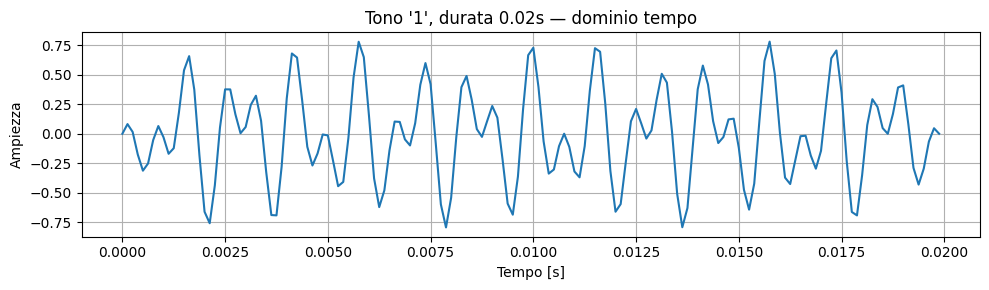

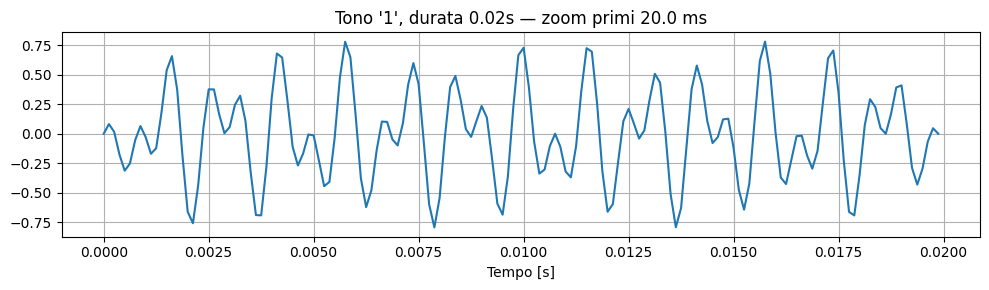

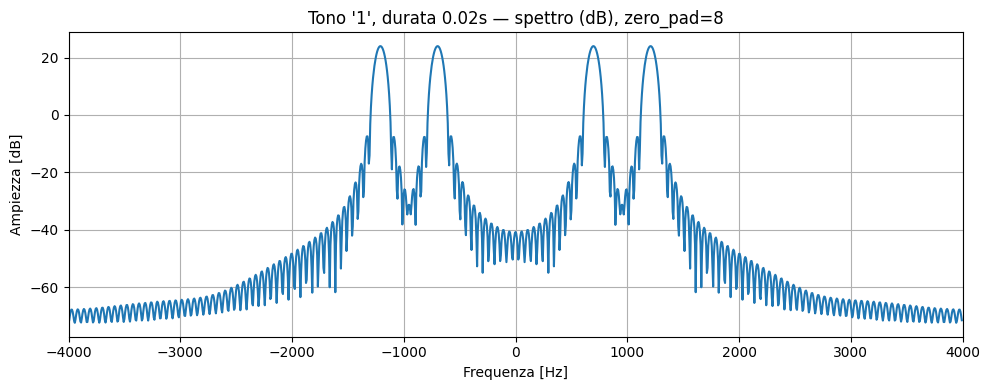

Duration 0.02s -> decoded='1', acc=100.00%


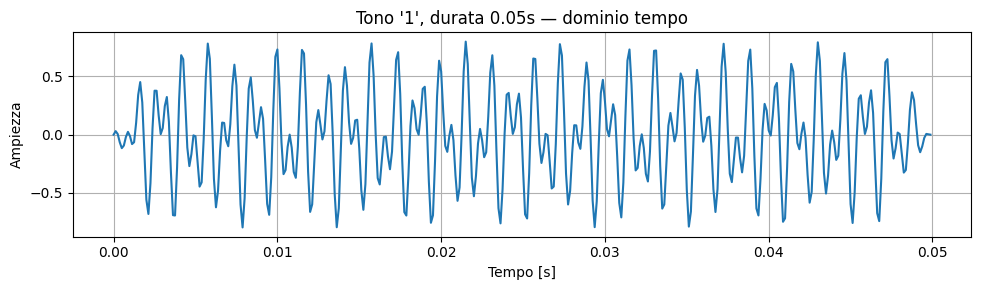

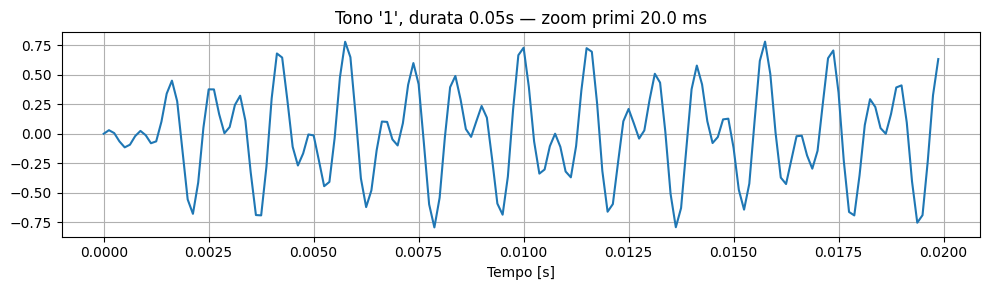

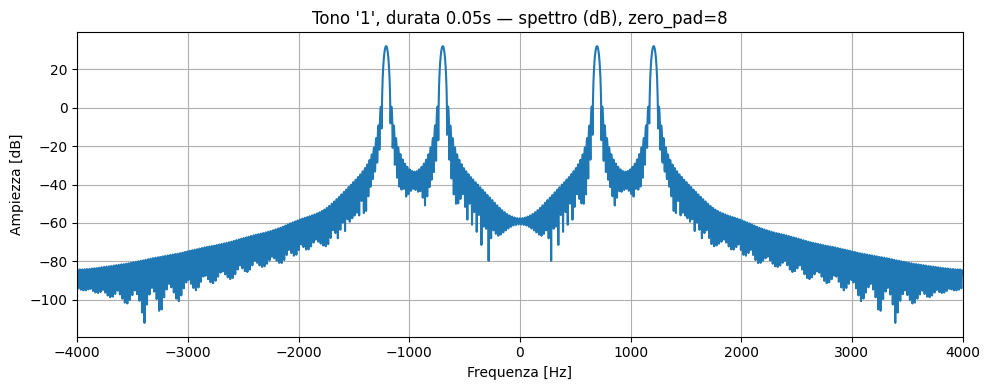

Duration 0.05s -> decoded='1', acc=100.00%


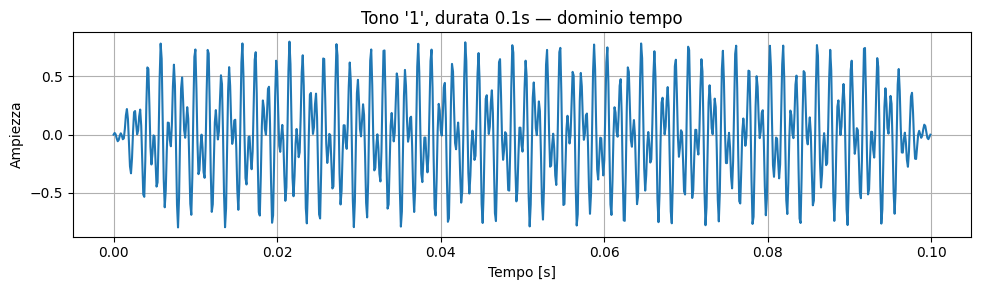

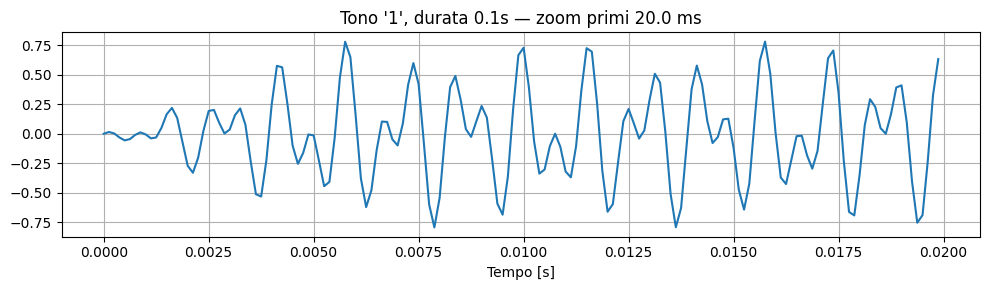

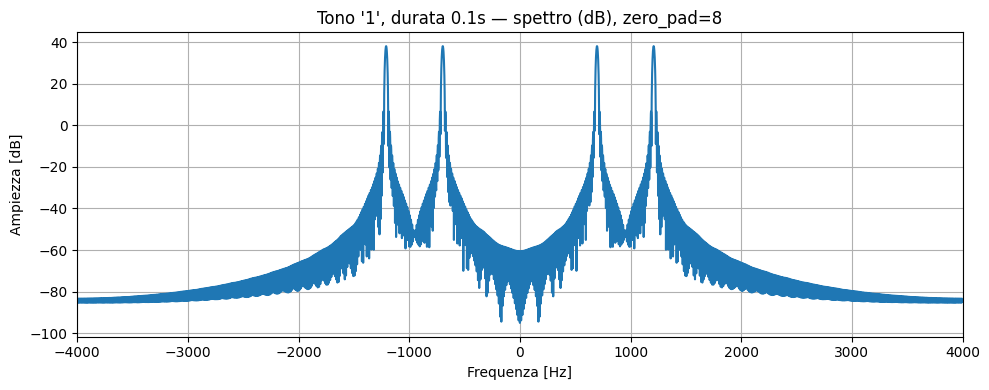

Duration 0.1s -> decoded='1', acc=100.00%


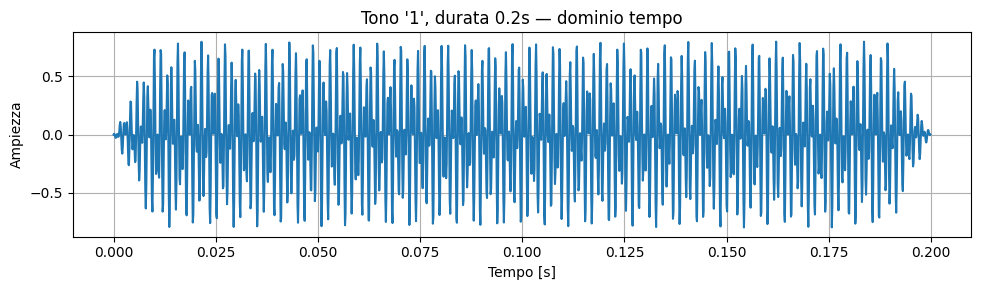

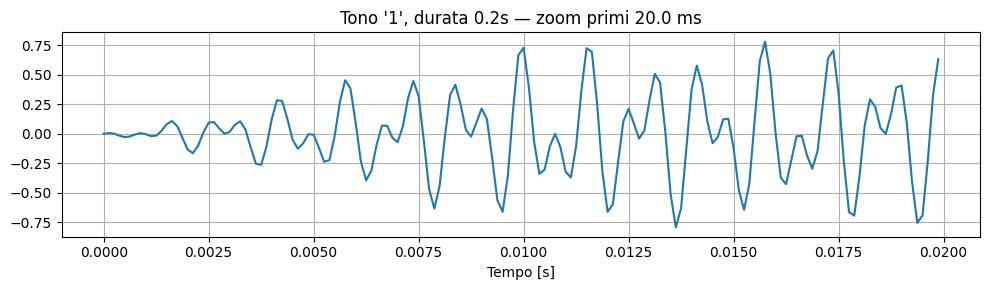

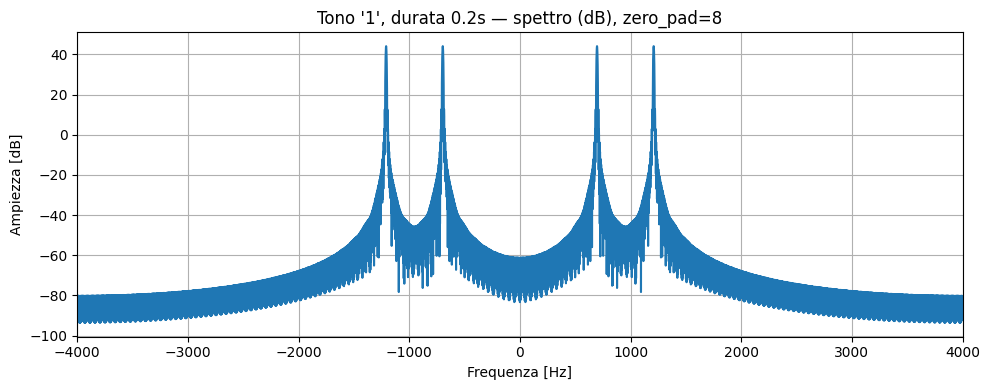

Duration 0.2s -> decoded='1', acc=100.00%


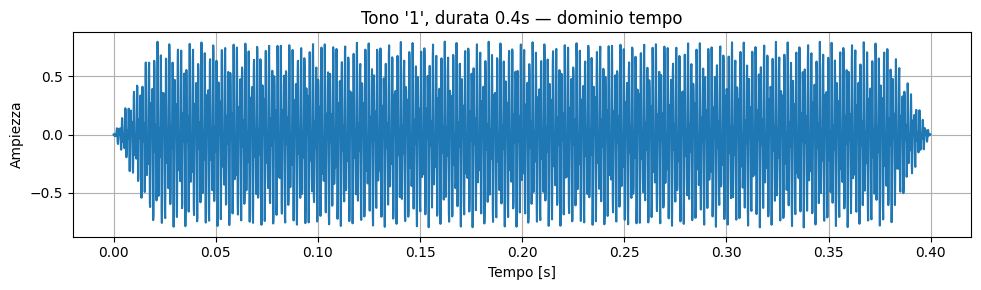

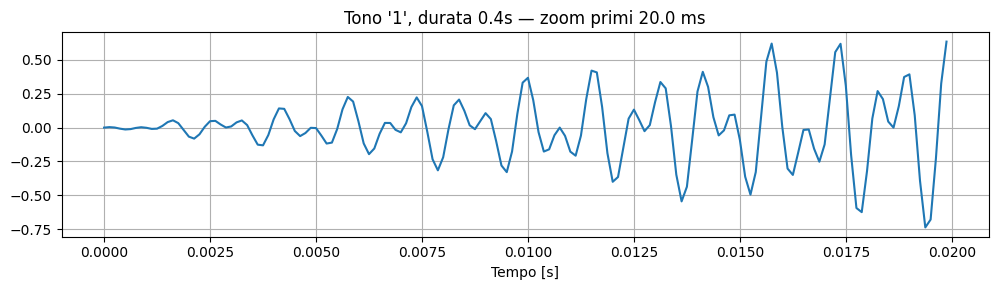

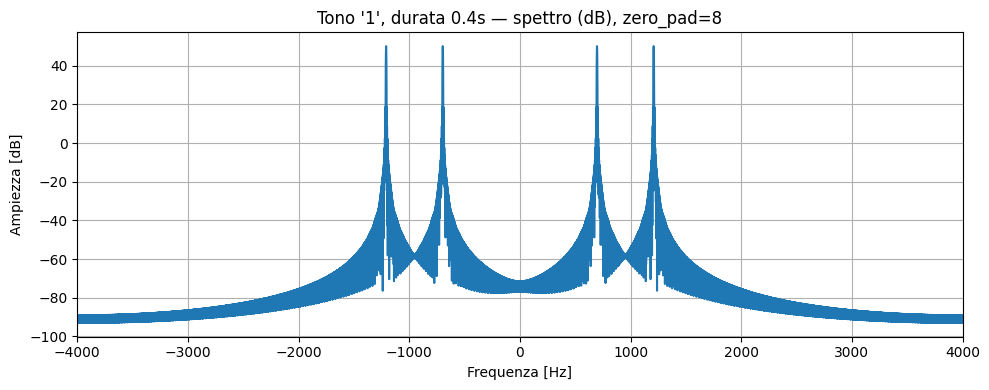

Duration 0.4s -> decoded='1', acc=100.00%

=== Esperimento: zero-padding ===


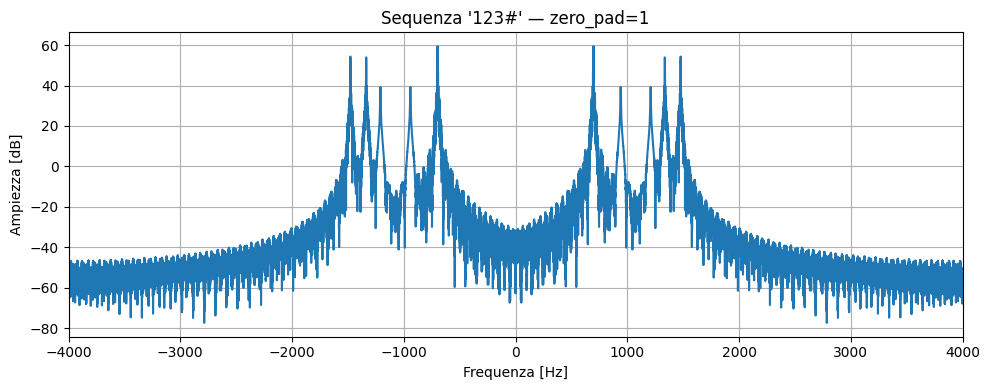

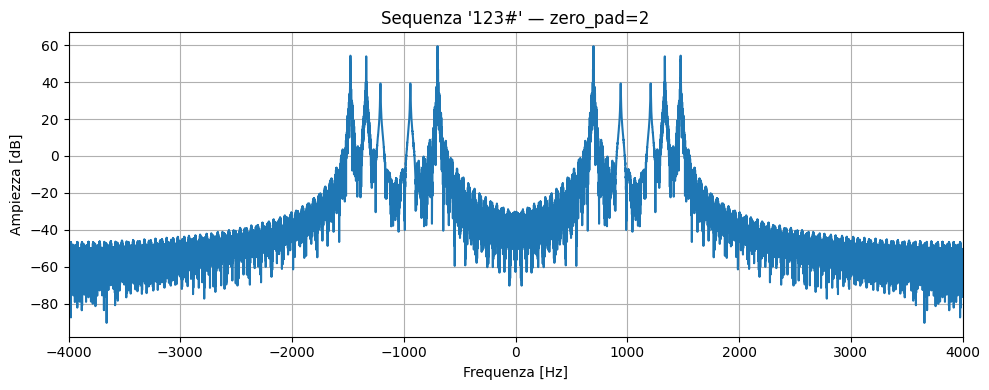

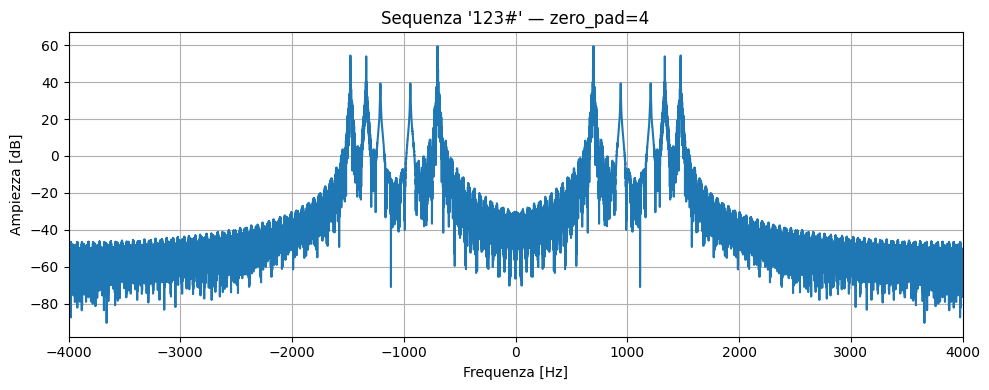

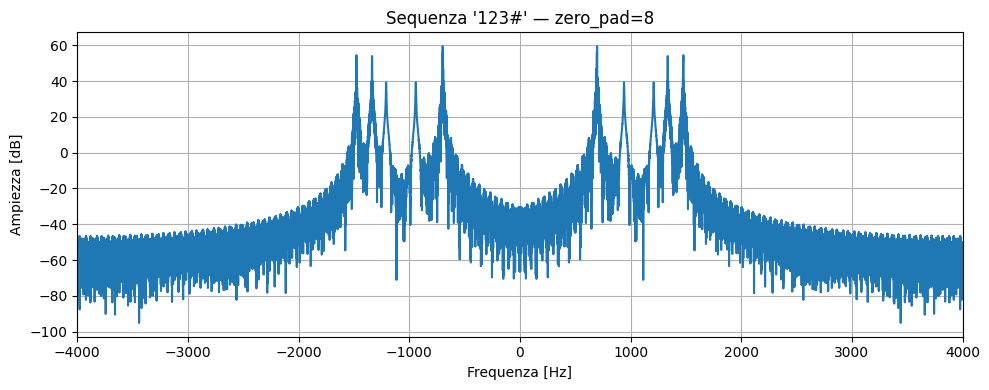

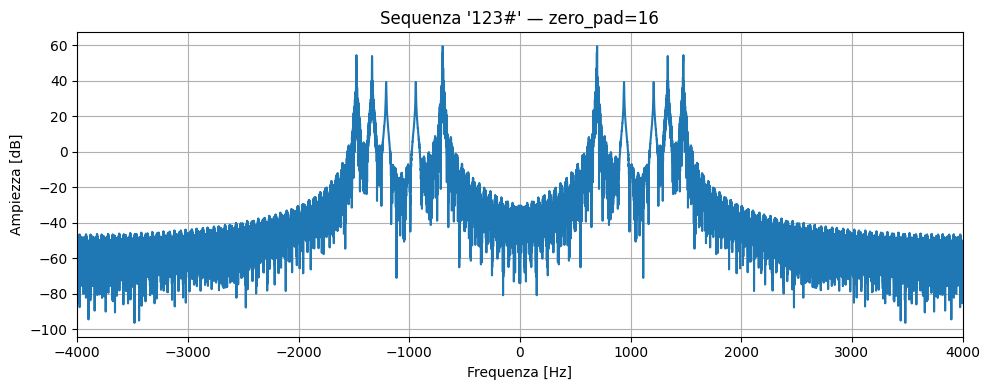


=== Esperimento: rumore ===


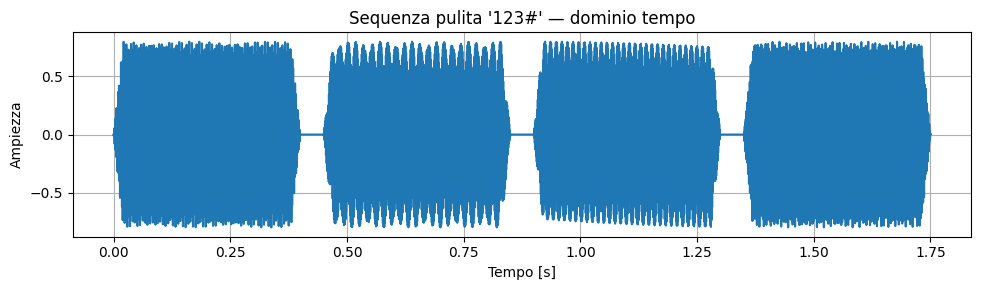

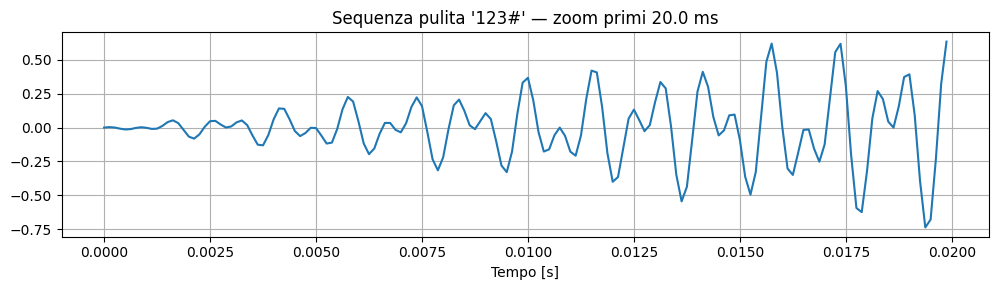

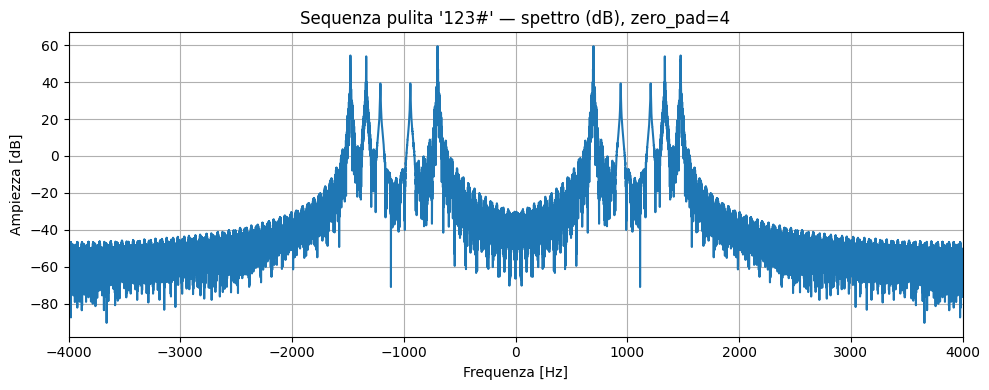

Noise std=0.005: accuracy mean=100.00%, std=0.00
Noise std=0.02: accuracy mean=100.00%, std=0.00
Noise std=0.05: accuracy mean=100.00%, std=0.00
Noise std=0.1: accuracy mean=100.00%, std=0.00


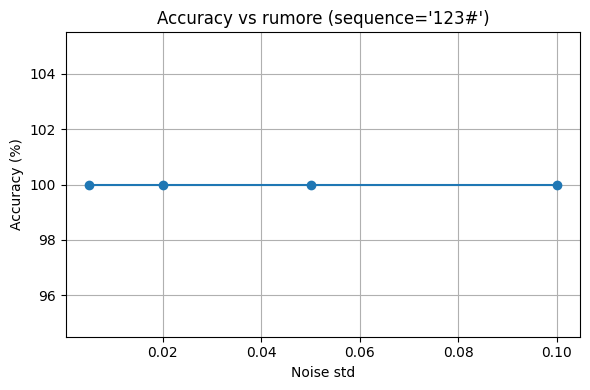


=== Esperimento: sampling rate ===


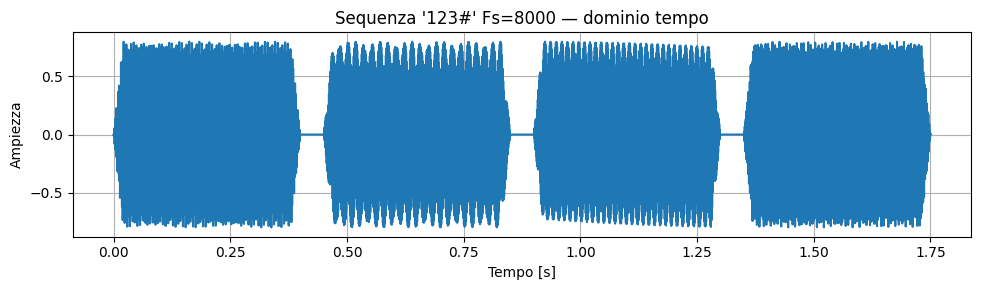

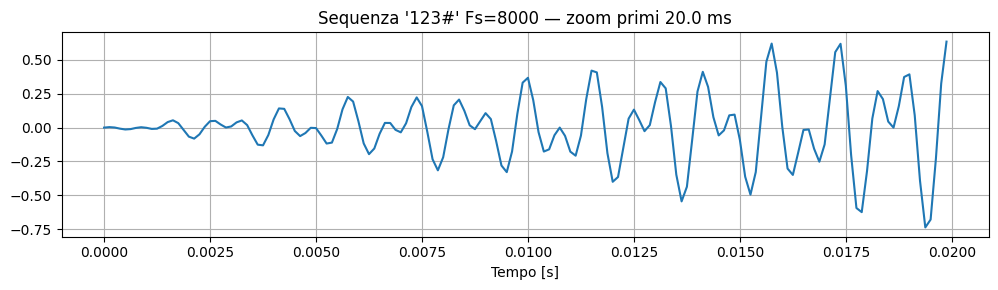

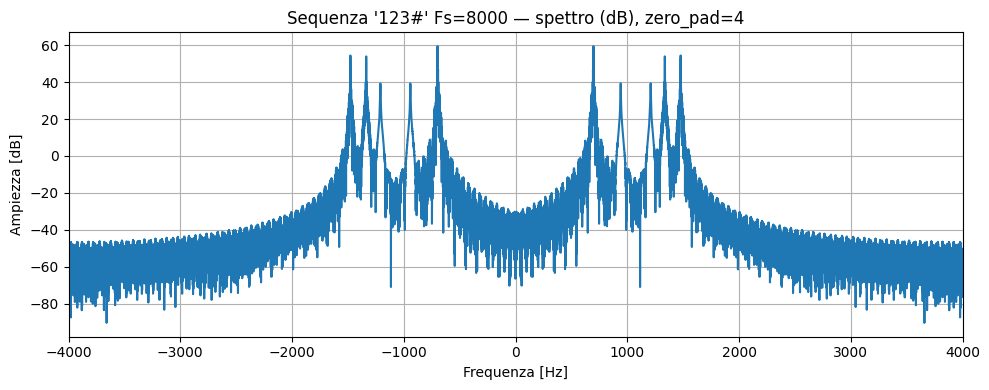

Fs 8000: decoded='123#', accuracy=100.00%


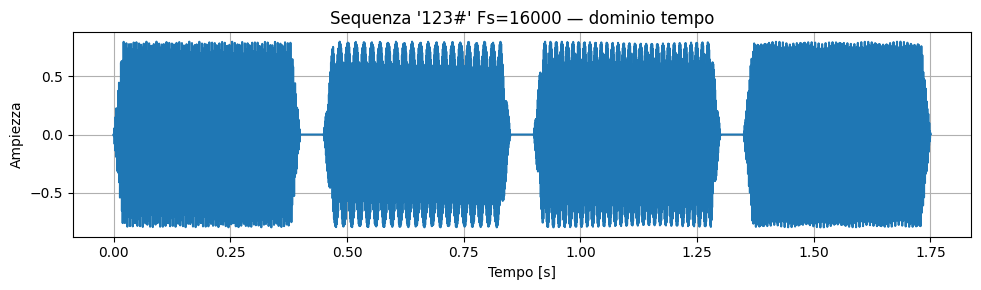

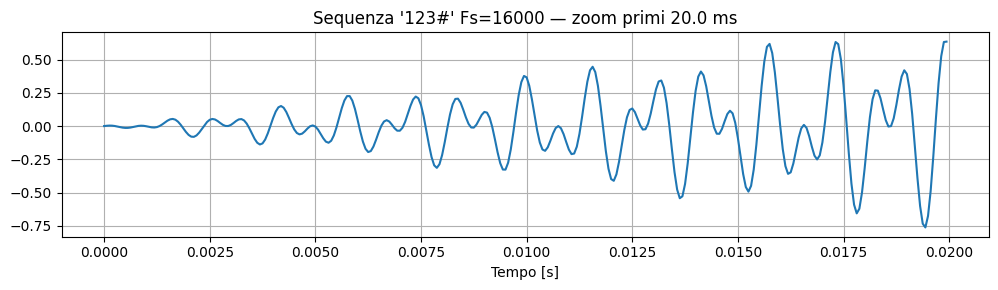

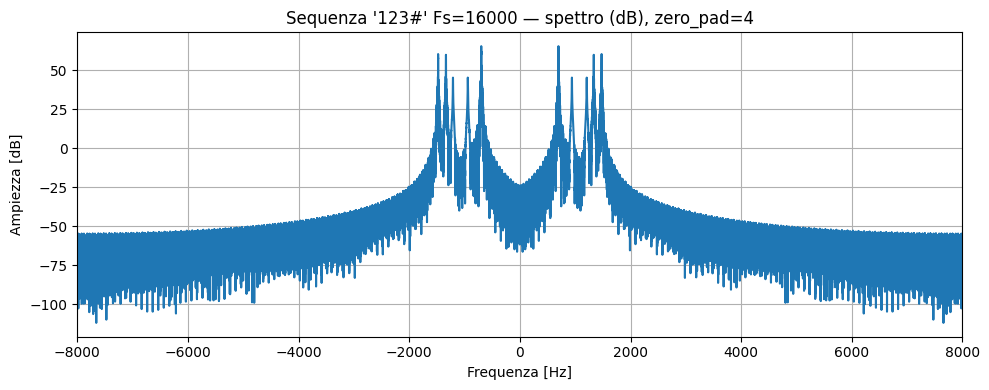

Fs 16000: decoded='123#', accuracy=100.00%


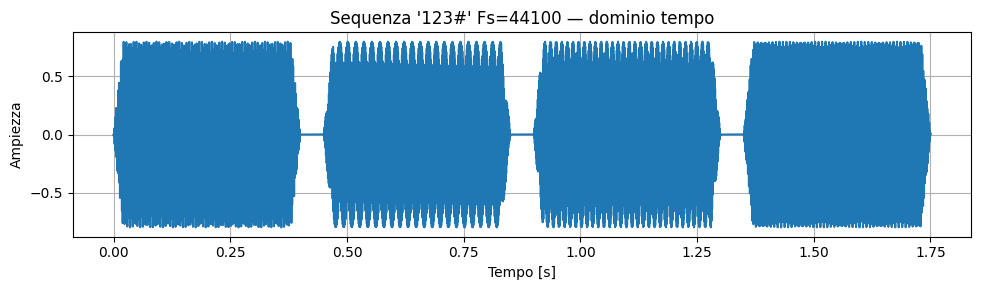

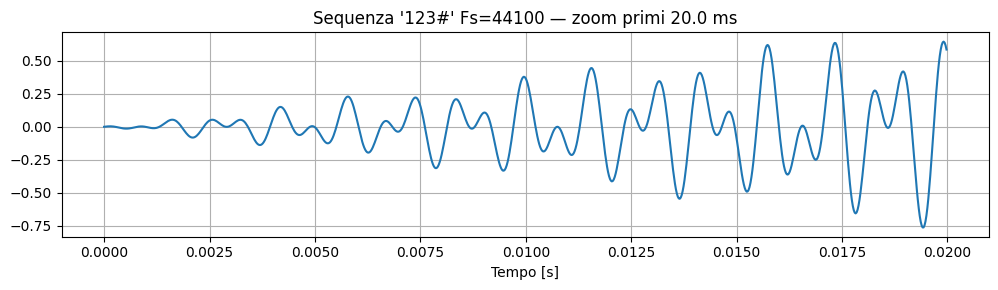

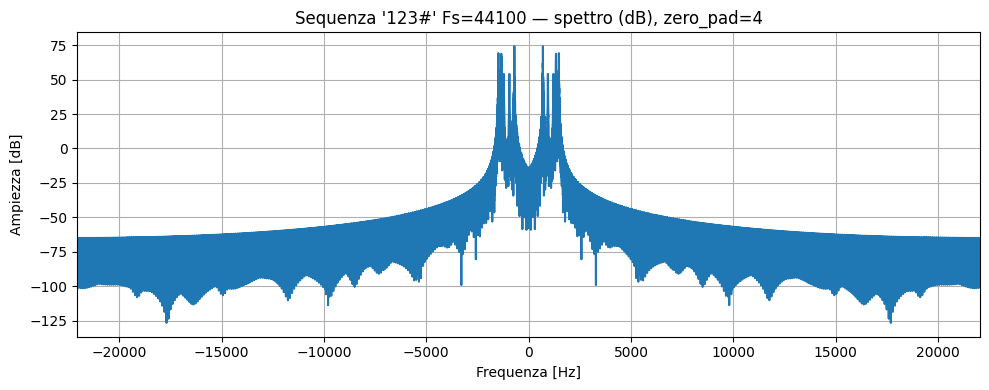

Fs 44100: decoded='123#', accuracy=100.00%


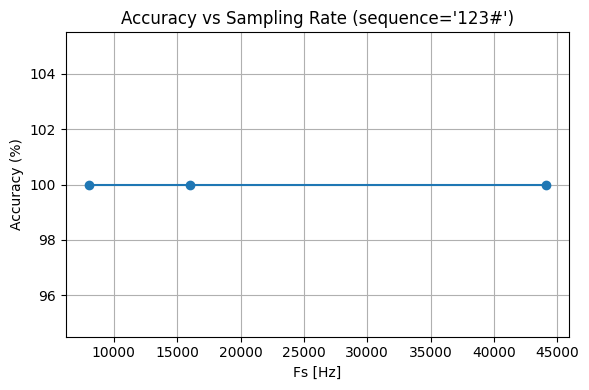


=== Esperimenti completati ===

Riepilogo (noise experiment):
noise std=0.005 -> accuracy mean=100.00% (std=0.00), wav=./experiments_results\noise\seq_123#_noise_5_fs8000.wav
noise std=0.02 -> accuracy mean=100.00% (std=0.00), wav=./experiments_results\noise\seq_123#_noise_20_fs8000.wav
noise std=0.05 -> accuracy mean=100.00% (std=0.00), wav=./experiments_results\noise\seq_123#_noise_50_fs8000.wav
noise std=0.1 -> accuracy mean=100.00% (std=0.00), wav=./experiments_results\noise\seq_123#_noise_100_fs8000.wav


In [7]:
"""
esperimenti_dtmf.py

Script modulare per eseguire gli esperimenti richiesti:
- effetto durata tono
- effetto zero-padding
- effetto rumore (SNR / deviazione standard)
- effetto frequenza di campionamento

Prerequisiti: numpy, matplotlib, scipy
(es. pip install numpy matplotlib scipy)
"""

import numpy as np
import os
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Optional
from scipy.io import wavfile
from copy import deepcopy

# ---------------------------------------------------------------------
# Tentativo di riuso: se nel notebook hai già implementazioni (es. esercizio 2-5),
# tenta di importarle. Altrimenti fornisco implementazioni minime.
# ---------------------------------------------------------------------
try:
    # prova a importare moduli/celle locali (se li hai salvati come moduli)
    from dtmf_modules import tone, dialNumber, decode_dtmf, build_frequency_arrays, build_tones_dict
    print("Usando funzioni importate da dtmf_modules.")
except Exception:
    # definizioni minime (compatibili con le celle fornite in chat)
    print("Non trovate funzioni importabili: uso implementazioni locali incluse nello script.")

    def build_frequency_arrays() -> Tuple[List[int], List[int]]:
        return [697, 770, 852, 941], [1209, 1336, 1477, 1633]

    def build_tones_dict() -> Dict[str, Tuple[int,int]]:
        return {
            '1': (0, 0), '2': (0, 1), '3': (0, 2), 'A': (0, 3),
            '4': (1, 0), '5': (1, 1), '6': (1, 2), 'B': (1, 3),
            '7': (2, 0), '8': (2, 1), '9': (2, 2), 'C': (2, 3),
            '*': (3, 0), '0': (3, 1), '#': (3, 2), 'D': (3, 3)
        }

    def get_tone_frequencies(key: str):
        F1, F2 = build_frequency_arrays()
        tones = build_tones_dict()
        if key not in tones:
            raise KeyError(f"Carattere {key} non valido")
        i, j = tones[key]
        return F1[i], F2[j]

    def tone(number: str,
             duration: float,
             fs: int = 8000,
             amplitude: float = 0.8,
             window: Optional[str] = 'fade') -> Tuple[np.ndarray, np.ndarray, int]:
        """Genera singolo tono DTMF (compatto)."""
        f_low, f_high = get_tone_frequencies(number)
        t = np.arange(0, duration, 1.0/fs)
        x = np.cos(2*np.pi*f_low*t) + np.cos(2*np.pi*f_high*t)
        maxv = np.max(np.abs(x)) if x.size>0 else 1.0
        x = (x / maxv) * amplitude
        # semplice fade
        if window == 'fade':
            n = len(x)
            fade_len = max(1, int(0.05 * n))
            env = np.ones(n)
            env[:fade_len] = np.linspace(0,1,fade_len)
            env[-fade_len:] = np.linspace(1,0,fade_len)
            x = x * env
        return t, x, fs

    def dialNumber(numbers: str,
                   toneDuration: float,
                   fs: int = 8000,
                   interToneGap: float = 0.05,
                   amplitude: float = 0.8,
                   window: str = 'fade',
                   out_dir: str = "./") -> Tuple[np.ndarray, int, str]:
        """Genera sequenza concatenata di toni DTMF e salva WAV."""
        parts = []
        gap = np.zeros(int(np.round(interToneGap*fs))) if interToneGap>0 else np.array([], dtype=float)
        for i,ch in enumerate(numbers):
            _, x, _ = tone(ch, toneDuration, fs=fs, amplitude=amplitude, window=window)
            parts.append(x)
            if i < len(numbers)-1 and gap.size>0:
                parts.append(gap)
        x = np.concatenate(parts) if parts else np.array([], dtype=float)
        # salva
        safe = "".join(ch if ch.isalnum() else ('star' if ch=='*' else 'hash' if ch=='#' else ch) for ch in numbers)
        fname = f"dtmf_sequence_{safe}_{int(toneDuration*1000)}ms_fs{fs}.wav"
        os.makedirs(out_dir, exist_ok=True)
        wavfile.write(os.path.join(out_dir, fname), fs, np.int16(np.clip(x, -1, 1)*32767))
        return x, fs, os.path.join(out_dir, fname)

    # For decoding, uso implementazione semplificata basata su spettro (vedi esercizio 5)
    def decode_dtmf(x: np.ndarray,
                    fs: int,
                    toneDuration: Optional[float] = None,
                    interToneGap: float = 0.05,
                    segmentation: str = 'fixed',
                    zero_pad_factor: int = 4,
                    delta_hz: float = 10.0,
                    window: str = 'hann') -> Tuple[str, List[Tuple[str, float]]]:
        """
        Semplice decode: se segmentation='fixed' divide il segnale in blocchi di toneDuration.
        Per ciascun blocco cerca i picchi nelle candidate F1,F2.
        Restituisce stringa decodificata e lista di (char, confidence).
        """
        F1, F2 = build_frequency_arrays()
        tones = build_tones_dict()
        inv = {v:k for k,v in tones.items()}
        x = np.asarray(x).flatten()
        if x.size==0:
            return "", []
        if segmentation == 'fixed':
            if toneDuration is None:
                raise ValueError("toneDuration richiesto per segmentation='fixed'")
            n_samples = int(round(toneDuration*fs))
            gap = int(round(interToneGap*fs))
            segs = []
            idx = 0
            while idx < len(x):
                segs.append(x[idx: idx + n_samples])
                idx += n_samples + gap
        else:
            # fallback: treat whole signal as single tone
            segs = [x]
        decoded = []
        details = []
        for seg in segs:
            if seg.size==0:
                continue
            # windowing
            if window == 'hann':
                w = np.hanning(len(seg))
                segw = seg * w
            else:
                segw = seg
            Npad = max(1, int(len(segw) * max(1, zero_pad_factor)))
            X = np.fft.fft(segw, n=Npad)
            freqs = np.fft.fftshift(np.fft.fftfreq(Npad, d=1.0/fs))
            Xs = np.abs(np.fft.fftshift(X))
            # search best in F1 and F2
            def best_in(cands):
                bestf, bestmag, bestcand = None, -1, None
                for c in cands:
                    idxs = np.where((freqs >= c-delta_hz) & (freqs <= c+delta_hz))[0]
                    if idxs.size==0:
                        continue
                    sub = Xs[idxs]
                    k = np.argmax(sub)
                    if sub[k] > bestmag:
                        bestmag = sub[k]
                        bestf = freqs[idxs[k]]
                        bestcand = c
                return bestcand, bestf, bestmag
            cand1, f1, m1 = best_in(F1)
            cand2, f2, m2 = best_in(F2)
            if cand1 is None or cand2 is None:
                decoded.append('?')
                details.append(('?', 0.0))
            else:
                i = F1.index(int(cand1)); j = F2.index(int(cand2))
                ch = inv.get((i,j), '?')
                decoded.append(ch)
                conf = (m1 + m2) / (np.max(Xs)+1e-12)
                details.append((ch, float(conf)))
        return "".join(decoded), details

# ---------------------------------------------------------------------
# Funzioni di utilità per gli esperimenti (plot, spettro, metriche)
# ---------------------------------------------------------------------
def compute_spectrum(x: np.ndarray, fs: int, zero_pad: int = 1, window: Optional[str] = 'hann') -> Tuple[np.ndarray, np.ndarray]:
    x = np.asarray(x).flatten()
    if x.size == 0:
        return np.array([]), np.array([])
    N = len(x)
    if window == 'hann':
        w = np.hanning(N)
    else:
        w = np.ones(N)
    xw = x * w
    Npad = max(1, int(N * max(1, zero_pad)))
    X = np.fft.fft(xw, n=Npad)
    Xs = np.fft.fftshift(X)
    freqs = np.fft.fftshift(np.fft.fftfreq(Npad, d=1.0/fs))
    mag = np.abs(Xs)
    return freqs, mag

def plot_time_and_spectrum(t: np.ndarray, x: np.ndarray, fs: int,
                           title_prefix: str = "", zoom_ms: Optional[float] = 20.0,
                           zero_pad: int = 1):
    """Plotta segnale tempo + spettro (dB)."""
    if x.size == 0:
        print("Segnale vuoto: niente da plottare.")
        return
    # tempo
    plt.figure(figsize=(10,3))
    plt.plot(t, x)
    plt.title(f"{title_prefix} — dominio tempo")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Ampiezza")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # zoom
    if zoom_ms is not None:
        pts = int(round((zoom_ms*1e-3) * fs))
        pts = min(pts, len(x))
        plt.figure(figsize=(10,3))
        plt.plot(t[:pts], x[:pts])
        plt.title(f"{title_prefix} — zoom primi {zoom_ms} ms")
        plt.xlabel("Tempo [s]")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # spettro
    freqs, mag = compute_spectrum(x, fs, zero_pad=zero_pad)
    if freqs.size>0:
        plt.figure(figsize=(10,4))
        # dB scale
        mag_db = 20*np.log10(mag + 1e-12)
        plt.plot(freqs, mag_db)
        plt.title(f"{title_prefix} — spettro (dB), zero_pad={zero_pad}")
        plt.xlabel("Frequenza [Hz]")
        plt.ylabel("Ampiezza [dB]")
        plt.xlim(-fs/2, fs/2)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def accuracy_decoding(decoded: str, truth: str) -> float:
    """Semplice percentuale di caratteri corretti (allineamento per indice)."""
    if len(truth)==0:
        return 0.0
    # confronta fino alla lunghezza min
    L = min(len(decoded), len(truth))
    correct = sum(1 for i in range(L) if decoded[i]==truth[i])
    # penalizza anche caratteri mancanti / in più
    acc = correct / len(truth)
    return 100.0 * acc

# ---------------------------------------------------------------------
# Esperimenti
# ---------------------------------------------------------------------
def experiment_tone_duration(key: str = '1',
                             durations: List[float] = [0.05, 0.1, 0.2, 0.4],
                             fs: int = 8000,
                             amplitude: float = 0.8,
                             zero_pad: int = 4,
                             out_dir: str = "./results_duration"):
    """
    Genera toni per diverse durate, plottando tempo + spettro.
    Ritorna una lista di tuple (duration, (decoded, details), wav_path)
    """
    os.makedirs(out_dir, exist_ok=True)
    results = []
    for d in durations:
        t, x, _ = tone(key, d, fs=fs, amplitude=amplitude, window='fade')
        title = f"Tono '{key}', durata {d}s"
        plot_time_and_spectrum(t, x, fs, title_prefix=title, zero_pad=zero_pad)
        # salva
        fname = f"{out_dir}/tone_{key}_{int(d*1000)}ms_fs{fs}.wav"
        wavfile.write(fname, fs, np.int16(np.clip(x, -1, 1)*32767))
        # prova a decodificare (se decode disponibile)
        decoded, details = decode_dtmf(x, fs, toneDuration=d, segmentation='fixed', zero_pad_factor=zero_pad, window='hann')
        acc = accuracy_decoding(decoded, key)
        print(f"Duration {d}s -> decoded='{decoded}', acc={acc:.2f}%")
        results.append((d, decoded, details, fname, acc))
    return results

def experiment_zero_padding(x: np.ndarray, fs: int, zero_pad_factors: List[int] = [1,2,4,8],
                            out_dir: str = "./results_zeropad", title="Segnale"):
    """
    Confronta spettro con diversi zero-padding fattori.
    """
    os.makedirs(out_dir, exist_ok=True)
    for zp in zero_pad_factors:
        freqs, mag = compute_spectrum(x, fs, zero_pad=zp, window='hann')
        plt.figure(figsize=(10,4))
        plt.plot(freqs, 20*np.log10(mag+1e-12))
        plt.title(f"{title} — zero_pad={zp}")
        plt.xlabel("Frequenza [Hz]")
        plt.ylabel("Ampiezza [dB]")
        plt.xlim(-fs/2, fs/2)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def experiment_noise_levels(sequence: str = "123#",
                            toneDuration: float = 0.4,
                            fs: int = 8000,
                            noise_stds: List[float] = [0.01, 0.05, 0.1, 0.2],
                            trials: int = 5,
                            out_dir: str = "./results_noise"):
    """
    Genera la sequenza, aggiunge rumore gaussiano a diversi livelli e valuta l'accuratezza.
    Ritorna risultati aggregati per livello di rumore.
    """
    os.makedirs(out_dir, exist_ok=True)
    x_clean, fs, _ = dialNumber(sequence, toneDuration, fs=fs, interToneGap=0.05, amplitude=0.8, window='fade', out_dir=out_dir)
    t = np.arange(len(x_clean))/fs
    plot_time_and_spectrum(t, x_clean, fs, title_prefix=f"Sequenza pulita '{sequence}'", zero_pad=4)

    results = []
    for sigma in noise_stds:
        accs = []
        for tr in range(trials):
            noise = np.random.normal(0, sigma, size=x_clean.shape)
            x_noisy = x_clean + noise
            decoded, details = decode_dtmf(x_noisy, fs, toneDuration=toneDuration, segmentation='fixed', zero_pad_factor=4, window='hann')
            acc = accuracy_decoding(decoded, sequence)
            accs.append(acc)
        mean_acc = float(np.mean(accs))
        std_acc = float(np.std(accs))
        print(f"Noise std={sigma}: accuracy mean={mean_acc:.2f}%, std={std_acc:.2f}")
        # salva esempio wav del primo trial
        fname = os.path.join(out_dir, f"seq_{sequence}_noise_{int(sigma*1000)}_fs{fs}.wav")
        wavfile.write(fname, fs, np.int16(np.clip(x_noisy, -1, 1)*32767))
        results.append((sigma, mean_acc, std_acc, fname))
    # plot accuracies
    sigmas = [r[0] for r in results]
    means = [r[1] for r in results]
    plt.figure(figsize=(6,4))
    plt.plot(sigmas, means, marker='o')
    plt.title(f"Accuracy vs rumore (sequence='{sequence}')")
    plt.xlabel("Noise std")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return results

def experiment_sampling_rates(sequence: str = "123#",
                              toneDuration: float = 0.4,
                              fs_list: List[int] = [8000, 16000, 44100],
                              interToneGap: float = 0.05,
                              amplitude: float = 0.8,
                              out_dir: str = "./results_fs"):
    """
    Genera la stessa sequenza con diverse frequenze di campionamento e valuta l'accuratezza.
    Nota: genera ogni volta al Fs richiesto (no resampling esplicito).
    """
    os.makedirs(out_dir, exist_ok=True)
    report = []
    for fs in fs_list:
        x, fs_used, path = dialNumber(sequence, toneDuration, fs=fs, interToneGap=interToneGap, amplitude=amplitude, window='fade', out_dir=out_dir)
        t = np.arange(len(x))/fs
        plot_time_and_spectrum(t, x, fs, title_prefix=f"Sequenza '{sequence}' Fs={fs}", zero_pad=4)
        decoded, details = decode_dtmf(x, fs, toneDuration=toneDuration, segmentation='fixed', zero_pad_factor=4, window='hann')
        acc = accuracy_decoding(decoded, sequence)
        print(f"Fs {fs}: decoded='{decoded}', accuracy={acc:.2f}%")
        report.append((fs, decoded, acc, path))
    # plot accuracies
    fss = [r[0] for r in report]
    accs = [r[2] for r in report]
    plt.figure(figsize=(6,4))
    plt.plot(fss, accs, marker='o')
    plt.title(f"Accuracy vs Sampling Rate (sequence='{sequence}')")
    plt.xlabel("Fs [Hz]")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return report

# ---------------------------------------------------------------------
# Funzione wrapper per eseguire tutti gli esperimenti in sequenza
# ---------------------------------------------------------------------
def run_all_experiments():
    out = "./experiments_results"
    os.makedirs(out, exist_ok=True)

    # 1) effetto durata del tono
    print("=== Esperimento: durata toni ===")
    res_dur = experiment_tone_duration(key='1',
                                       durations=[0.02, 0.05, 0.1, 0.2, 0.4],
                                       fs=8000,
                                       amplitude=0.8,
                                       zero_pad=8,
                                       out_dir=os.path.join(out, "duration"))

    # 2) effetto zero-padding su una sequenza di test
    print("\n=== Esperimento: zero-padding ===")
    seq = "123#"
    x_seq, fs_seq, _ = dialNumber(seq, 0.4, fs=8000, out_dir=os.path.join(out, "zeropad"))
    experiment_zero_padding(x_seq, fs_seq, zero_pad_factors=[1,2,4,8,16], out_dir=os.path.join(out, "zeropad"), title=f"Sequenza '{seq}'")

    # 3) effetto rumore
    print("\n=== Esperimento: rumore ===")
    res_noise = experiment_noise_levels(sequence="123#", toneDuration=0.4, fs=8000, noise_stds=[0.005,0.02,0.05,0.1], trials=10, out_dir=os.path.join(out, "noise"))

    # 4) effetto Fs
    print("\n=== Esperimento: sampling rate ===")
    res_fs = experiment_sampling_rates(sequence="123#", toneDuration=0.4, fs_list=[8000, 16000, 44100], out_dir=os.path.join(out, "fs"), interToneGap=0.05)

    print("\n=== Esperimenti completati ===")
    return {"duration": res_dur, "zeropad": None, "noise": res_noise, "fs": res_fs}

# ---------------------------------------------------------------------
# Se eseguito come script
# ---------------------------------------------------------------------
if __name__ == "__main__":
    results = run_all_experiments()
    # stampa riepilogo sintetico
    print("\nRiepilogo (noise experiment):")
    for r in results['noise']:
        print(f"noise std={r[0]} -> accuracy mean={r[1]:.2f}% (std={r[2]:.2f}), wav={r[3]}")
